# <center> Data Analysis Project </center>
### <center> Курс "Анализ данных в экономике и финансах." </center>

<a id='ss'></a>

### Contents
1. [**Basic Exploratory Analysis**](#s1)
   - [Primary Explopration](#s2)


2. [**Filling the Missing Data**](#s3)
   - [Names](#s4)
   - [Minor Filling & Shaping Dataset](#s5)
       - [Staff Table Updates](#s6)
   - [Film Length](#s8)
   - [Premiere Russia](#s9)
   - [Budget and Box Office](#s10)
   
   
3. [**Data Types**](#s7)


4. [**Converting Currencies and Discounting**](#s11)


5. [**Reduction to First Normal Form**](#s16)


6. [**Transferring Data to MySQL**](#s12)


7. [**Basic Visualization**](#s13)
    - [Corr Matrix & HeatMap](#s14)
    - [Word Cloud](#s24)
    
    
8. [**Model Creation & Testing**](#s15)

    - [Linear Regression](#s17)
    - [Ridge](#s18)
    - [Polynomial](#s19)
    - [KNN](#s20)
    - [Radius Neighbours](#s21)
    - [Decision Trees](#s22)
    - [Lasso](#s23)


<a id='s1'></a>

## Basic Exploratory Analysis

In [12]:
import json
import numpy as np
import pandas as pd

In [13]:
from getpass import getpass
from mysql.connector import connect, Error

In [14]:
conn_data = connect(host="localhost",
                    user='root',
                    password='Kinopoisk231.',
                    database='kinopoisk_movies')
cur_data = conn_data.cursor(buffered=True)

In [15]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', None)

In [16]:
df = pd.read_sql('''SELECT * FROM kinopoisk_movies.movies m ''', con=conn_data)

In [17]:
df

,kinopoiskId,nameRu,nameEn,year,webUrl,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,premiereWorld,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,The Matrix,1999.0,https://www.kinopoisk.ru/film/301/,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16.0,"Австралия, США","боевик, фантастика",02:16,1999-10-14,1999-03-24,"Каро-Премьер, Маурис Филм",63000000.0,USD,NaN,None,463517000.0,USD,23330.0,7836.0,1790.0,23329.0,278101.0,310065.0,8.5
1,312,Властелин колец: Две крепости,The Lord of the Rings: The Two Towers,2002.0,https://www.kinopoisk.ru/film/312/,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12.0,"Новая Зеландия, США","драма, приключения, фэнтези",02:59,2003-01-22,2002-12-05,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,USD,936690000.0,USD,32383.0,20287.0,32383.0,32384.0,225142.0,1995795.0,8.6
2,326,Побег из Шоушенка,The Shawshank Redemption,1994.0,https://www.kinopoisk.ru/film/326/,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16.0,США,драма,02:22,1999-09-01,1994-09-10,Иноекино,25000000.0,USD,87432.0,USD,28418700.0,USD,24262.0,7987.0,102292.0,24263.0,258609.0,1986116.0,9.1
3,328,Властелин колец: Братство Кольца,The Lord of the Rings: The Fellowship of the Ring,2001.0,https://www.kinopoisk.ru/film/328/,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12.0,"Новая Зеландия, США","драма, приключения, фэнтези",02:58,2002-02-07,2001-12-10,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,USD,880840000.0,USD,32383.0,20287.0,32383.0,32384.0,225142.0,537276.0,8.6
4,336,Пролетая над гнездом кукушки,One Flew Over the Cuckoo's Nest,1975.0,https://www.kinopoisk.ru/film/336/,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18.0,США,драма,02:13,2021-05-27,1975-11-19,Иноекино,3000000.0,USD,114192.0,USD,108981000.0,USD,20418.0,30056.0,10094.0,179853.0,118654.0,9775.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,4640143,Братцы кролики: Байки старого замка,None,2021.0,https://www.kinopoisk.ru/fil

In [18]:
# ссылки в нашем анализе не пригодятся
df = df.drop('webUrl', axis=1)

Так как предсказывать будем российские сборы, можно удалить  дату мировой премьеры, оставив признак year, которые отображает "возраст" фильма - дату завершения его производства. 

In [19]:
df = df.drop('premiereWorld', axis=1)

In [20]:
df.shape

(5465, 24)

<a id='s2'></a>

### Primary Exploration

In [21]:
# посмотрим на кол-во уникальных зачений каждого признака
for i in df.columns:
    print(i, ': ', df[i].nunique(), sep='')

kinopoiskId: 5465
nameRu: 5315
nameEn: 4169
year: 63
description: 5384
ratingAgeLimits: 5
countries: 854
genres: 869
filmLength: 175
premiereRu: 1121
distributors: 271
budget: 418
currency_budget: 21
rus: 4312
currency_rus: 1
world: 3760
currency_world: 1
director_id: 3526
actor_id: 3179
producer_id: 3285
writer_id: 3784
operator_id: 2164
editor_id: 2396
ratingKinopoisk: 74


In [22]:
# полностью дублированных записей нет
df.duplicated().value_counts()

False    5465
dtype: int64

Некоторые параметры, которые, казалось бы, должны быть абсолютно уникальными, имеют меньшее количество не повторяющихся значений. Например, название фильма на русском или описание, но это лишь означает, что в выборке существуют фильмы с одинаковыми названиями, которые могут быть переснятыми версиями, например, а в описаниях повторяется лишь отсутствие описания (значение None), что вполне логично.

In [23]:
df.duplicated(subset=['nameRu']).value_counts()

False    5316
True      149
dtype: int64

In [24]:
pd.concat(g for _, g in df.groupby('nameRu') if len(g) > 1)

,kinopoiskId,nameRu,nameEn,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
1499,647218,Ангел,None,2011.0,"Рассказ о ребенке, несущем в себе духовный свет надежды, для которого, детство закончилось разлукой с матерью. Мама, решая свои личные проблемы, отправляет Юрика на лето к прадеду в деревню. Летние каникулы, обычно приносящие столько радости и впечатлений, стали для нашего героя настоящим испытанием...",12.0,Россия,"драма, семейный",01:29,2011-11-24,Гельварс,NaN,None,NaN,None,NaN,None,1307854.0,2670280.0,231250.0,1797393.0,1948753.0,2429899.0,5.8
4030,1064391,Ангел,El Ángel,2018.0,"Карлитосу 17, у него ангельское лицо и дьявольские наклонности. В школе он знакомится с Рамоном, с которым они составляют блистательный и беспощадный дуэт. На пути изощренного воровства и лжи их совместные преступления становятся лучшим самовыражением.",18.0,"Аргентина, Испания","биография, драма, криминал",01:58,2019-01-31,Про:взгляд,NaN,None,89223.0,USD,5604680.0,USD,770244.0,4819296.0,980.0,770244.0,646238.0,1999597.0,6.5
140,252077,Анна Каренина,None,2008.0,Экранизация известного романа Льва Николаевича Толстого. История незаконной и трагичной любви замужней дамы Анны Карениной к блестящему офицеру Вронскому.,16.0,Россия,драма,02:00,2011-06-15,Линия Кино,NaN,None,NaN,None,NaN,None,171583.0,171587.0,231415.0,171583.0,75880.0,2001262.0,5.9
1099,575195,Анна Каренина,Anna Karenina,2012.0,"Встречая приехавшую из Петербурга мать, молодой блистательный офицер граф Вронский знакомится с женой влиятельного петербургского чиновника Анной Карениной. Огонь страсти вспыхивает мгновенно, но их любовь шокирует высшее общество. В мире, где правят предрассудки и стереотипы, ей придётся сделать поистине непростой выбор между семьёй и всепоглощающей страстью...",18.0,Великобритания,"драма, мелодрама",02:09,2013-01-10,UPI,NaN,None,8372240.0,USD,69987900.0,USD,260620.0,24302.0,22409.0,47199.0,610724.0,2000901.0,6.8
1793,682963,Беглецы,None,2014.0,"Он - вне закона, по его пятам идут охотники за головами. Она знает тайгу, как свои пять пальцев, и только вместе они могут остаться в живых. Тайга общая: кто сильнее, тот и прав, а охота уже началась…",16.0,"Казахстан, Россия","приключения, триллер",01:35,2014-09-25,DreamTeam,1500000.0,USD,29147.0,USD,NaN,None,1762039.0,52108.0,277020.0,1762039.0,2341124.0,2342985.0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,711072,Эпидемия,Los últimos días,2013.0,"2013 год. Таинственная эпидемия мгновенно распространилась по планете: теперь миром правит агорафобия - боязнь открытого пространства. Оставшиеся в живых люди прячутся под землей или внутри зданий.\n\nОфисного клерка Марка эпидемия застала на работе. Дома у него осталась беременная жена, которая должна вот-вот родить. Ему нужно вернуться к ней, но выйти на улицу он не может. Марк начинает свой путь по подземным коммуникациям, перебираясь из подвала в другой подвал, из одного тоннеля метро в другой тоннель.",16.0,"Испания, Франция","триллер, ужасы, фантастика",01:43,2013-10-31,Ракета Релизинг,5000000.0,EUR,3793.0,USD,4343820.0,USD,296307.0,677483.0,446232.0,296307.0,618082.0,861887.0,5.8
1126,577529,Этот неловкий момент,That Awkward Moment,2014.0,"Джейсон, Дэниел и Майкл – типичные обитатели Манхеттена, красивые остроумные парни. После того, как одного из них бросает подружка, они клянутся больше никогда не заводить с девушками серьезных отношений. Но очень скоро, после кучи «неловких моментов», они встречают настоящую любовь. И как теперь быть с дружеской сделкой?",16.0,США,"комедия, мелодрама",01:34,2014-02-06,Парадиз,8000000.0,USD,1068030.0,USD,45640100.0,USD,1744092.0,731804.0,33030.0,1744092.0,619910.0,1207546.0,5.9
1594,663695,Этот неловкий момент,Un moment d'égarement,2015.0,"Два закадычных друга со своими дочерьми проводят отпу

In [25]:
df_help2 = df[df.duplicated(['description'])]
df_help2

,kinopoiskId,nameRu,nameEn,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
2414,806964,Неудержимые 4,The Expendables 4,NaN,None,NaN,США,"боевик, военный, приключения, триллер",None,None,,NaN,None,NaN,None,NaN,None,3640.0,460188.0,966320.0,309193.0,NaN,NaN,NaN
2553,837777,Def Leppard Viva! Hysteria!,Def Leppard Viva! Hysteria!,2013.0,None,12.0,США,"концерт, музыка",01:27,2014-03-04,НеваФильм Emotion,NaN,None,NaN,None,NaN,None,NaN,1111370.0,NaN,NaN,NaN,2228229.0,6.4
2743,843377,Ромео и Джульетта,None,2013.0,None,16.0,Россия,"драма, мелодрама",02:11,None,CoolConnections,NaN,None,NaN,None,NaN,None,NaN,3725492.0,NaN,NaN,NaN,NaN,NaN
2745,843379,Дева озера,La Donna del Lago,2014.0,None,16.0,США,,03:30,None,CoolConnections,NaN,None,NaN,None,NaN,None,NaN,1299482.0,NaN,NaN,NaN,NaN,NaN
2747,843381,Сказки Гофмана,None,2014.0,None,16.0,Россия,,03:46,None,CoolConnections,NaN,None,NaN,None,NaN,None,NaN,2506903.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,4499697,None,Presque,2021.0,None,NaN,"Франция, Швейцария",,01:32,2022-03-03,Парадиз,NaN,None,NaN,None,NaN,None,250101.0,250101.0,6478475.0,250101.0,557573.0,NaN,NaN
5430,4510158,Комната чудес,La chambre des merveilles,NaN,None,NaN,Франция,,None,None,Capella Film,NaN,None,NaN,None,NaN,None,240049.0,1960044.0,231346.0,268763.0,NaN,3808975.0,NaN
5431,4511796,None,Salem's Lot,2022.0,None,NaN,США,ужасы,None,2022-09-08,UPI,NaN,None,NaN,None,NaN,None,1462324.0,10028.0,1468292.0,1462324.0,3894893.0,NaN,NaN
5440,4526285,Halsey: If I Can't Have Love I Want Power,,2021.0,None,18.0,США,"драма, мюзикл, ужасы, фэнтези",00:53,2021-08-28,CoolConnections,NaN,None,NaN,None,NaN,None,6511965.0,3928596.0,3294359.0,3928596.0,NaN,NaN,NaN


In [26]:
# удостоверимся, что все 80 записей None
df_help2.description.value_counts()

Series([], Name: description, dtype: int64)

Посмотрим дополнительно на наборы уникальных значений признаков. 

In [27]:
df.year.value_counts()

2018.0    566
2019.0    554
2017.0    467
2015.0    464
2013.0    460
         ... 
2004.0      1
1940.0      1
1957.0      1
1993.0      1
1918.0      1
Name: year, Length: 63, dtype: int64

In [28]:
df.currency_rus.value_counts()
# можно было бы предположить, что все российские сборы на сайте в американских долларах?

USD    4362
Name: currency_rus, dtype: int64

In [29]:
df.currency_world.value_counts()

USD    3767
Name: currency_world, dtype: int64

In [30]:
df.currency_budget.value_counts()

USD    1780
EUR     255
RUB     199
GBP      24
RUR      13
CAD      12
AUD      10
DKK       9
NOK       8
CNY       4
BRL       4
JPY       4
PLN       2
MXN       2
HUF       2
FRF       1
ATS       1
CLP       1
SEK       1
CHF       1
INR       1
Name: currency_budget, dtype: int64

In [31]:
df.ratingAgeLimits.value_counts()

16.0    2162
18.0    1351
12.0     845
6.0      509
0.0      309
Name: ratingAgeLimits, dtype: int64

In [32]:
# интересно, что есть еще не вышедшие фильмы (62 штуки). 
# Для модели мы их использовать не можем, но могли бы попробовать предсказать их сборы, если бы имели данные о бюджете.
df_future = df[df.year > 2021]

In [33]:
df_future

,kinopoiskId,nameRu,nameEn,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
130,195483,Флэш,The Flash,2022.0,"Физик-ядерщик Барри Аллен в ходе неудачного научного эксперимента отравился ядохимикатами. Но, к собственному удивлению, не погиб, а приобрел новые поразительные способности – теперь он способен развивать невообразимую скорость.",NaN,США,"боевик, приключения, фантастика, фэнтези",None,2022-11-03,UPI,NaN,None,NaN,None,NaN,None,458232.0,22773.0,740981.0,699962.0,616153.0,1987175.0,NaN
537,468373,Анчартед: На картах не значится,Uncharted,2022.0,"Нейтан Дрейк и Виктор «Салли» Салливан, два искателя приключений, отправляются на поиски величайшего сокровища мира. Кроме того, они надеются найти улики, которые приведут их к давно потерянному брату Нейтана.",NaN,США,"боевик, приключения",None,2022-02-10,СППР,NaN,None,NaN,None,NaN,None,1005180.0,4313600.0,3923490.0,224291.0,649614.0,321611.0,NaN
783,505898,Аватар 2,Avatar 2,2022.0,"После принятия образа аватара солдат Джейк Салли становится предводителем народа на'ви и берет на себя миссию по защите новых друзей от корыстных бизнесменов с Земли. Теперь ему есть за кого бороться — с Джейком его прекрасная возлюбленная Нейтири. Когда на Пандору возвращаются до зубов вооруженные земляне, Джейк готов дать им отпор.",NaN,США,"боевик, приключения, триллер, фантастика",None,2022-12-15,Дисней Студиос,NaN,None,NaN,None,NaN,None,27977.0,10661.0,27977.0,27977.0,408797.0,2004040.0,NaN
1054,572032,Топ Ган: Мэверик,Top Gun: Maverick,2022.0,"Пит Митчелл по прозвищу Мэверик более 30 лет остается одним из лучших пилотов ВМФ: бесстрашный летчик-испытатель, он расширяет границы возможного и старательно избегает повышения в звании, которое заставило бы его приземлиться навсегда. Приступив к подготовке отряда выпускников «Топ Ган» для специальной миссии, подобной которой никогда не было, Мэверик встречает лейтенанта Брэдли Брэдшоу, сына своего покойного друга, лейтенанта Ника Брэдшоу.\n\nВпереди — неопределенность, за спиной — призраки прошлого. Мэверик вынужден противостоять своим глубинным страхам, которые грозят ожить в рамках миссии, требующей исключительной самоотверженности от тех, кто будет назначен на вылет.",16.0,"Китай, США","боевик, драма",None,2021-11-18,Централ Партнершип,140000000.0,USD,NaN,None,NaN,None,1331451.0,20302.0,10207.0,8444.0,656070.0,1988703.0,NaN
1252,590286,Бэтмен,The Batman,2022.0,"Новая история величайшего борца с преступностью и его альтер эго, миллиардера-затворника Брюса Уэйна.",16.0,США,"боевик, детектив, драма, криминал",None,2022-03-03,UPI,NaN,None,NaN,None,NaN,None,57376.0,544406.0,465965.0,57376.0,735550.0,38949.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,4511796,None,Salem's Lot,2022.0,None,NaN,США,ужасы,None,2022-09-08,UPI,NaN,None,NaN,None,NaN,None,1462324.0,10028.0,1468292.0,1462324.0,3894893.0,NaN,NaN
5444,4528801,Доктор Свисток,None,2022.0,"Арсен из приморского Дагомыса с детства мечтал стать пластическим хирургом. Его мечта почти сбылась — он устроился в московскую клинику пластической хирургии… администратором. У Арсена не было медицинского образования, но хорошо получалось зарабатывать, выдавая китайские импланты за швейцарские или продавая пациенткам место в очереди. Все у него было схвачено, пока у очередной звезды шоу-бизнеса «свежий тюнинг» не взорвался прямо на борту самолета! Вместе с фейковыми имплантами в клочья разлетелась и карьера Арсена — он вынужден бежать из Москвы в родной Сочи. Где, в чем он уверен, его богатый опыт позволит открыть собственную клинику и сделать этот мир лучше! Ну или, по крайней мере, больше…",NaN,Россия,комедия,None,None,"MEGOGO Distribution, MEGOGO Studios",NaN,None,NaN,None,NaN,None,3118395.0,5968714.0,1678244.0,2231625.0,3456284.0,NaN,NaN
5448,4533880,Крылья над Берлином,None

In [34]:
df = df.drop(df[df.year > 2021].index)

<a id='s3'></a>

## NaNs

In [35]:
# пропуски в данных
data_nan = df.isnull().sum()
data_nan.head(30)

kinopoiskId           0
nameRu               15
nameEn             1223
year                  7
description          53
ratingAgeLimits     240
countries             0
genres                0
filmLength           54
premiereRu          487
distributors          0
budget             3072
currency_budget    3072
rus                1042
currency_rus       1042
world              1637
currency_world     1637
director_id          38
actor_id            227
producer_id         229
writer_id           285
operator_id         758
editor_id           776
ratingKinopoisk     646
dtype: int64

Мы видели, что в данных пропуски обозначаются различными значениями: некоторые заполнены типом NaN, некоторые пустые None. Хоть они и читаются в коде одинако, стандартизуем все и исправим на специальный тип np.NaN.

In [36]:
df = df.fillna(value=np.nan)

In [37]:
null = df.dropna()

In [38]:
null.shape

(1509, 24)

Если грубо удалить все записи с какими-либо пропусками, то останется 1509 фильмов. Результат неплохой, но хотелось бы спасти как можно больше данных для последующего анализа. 
Сразу удалим данные с пропусками, которые мы никак кроме повтороного обширного сбора данных не сможем восстановить. То есть удалим данные с пропусками о рейтинге на кинопоиске, о режиссере, описании (хотя его мы, скорее всего, при построении модели использовать не будем), продолжительности картины.

P.S. дополнительный анализ показал, что, например, все 7 фильмов с пропущенным годом выпуска еще не вышли в прокат, поэтому есть вероятность, что пропуски в описании и режиссере, продолжительности фильма были не недостатком неполноты данных, а их действительным отсутствием на настоящий момент. К тому же, удаляя записи с пропущенными значениями по этим признакам, мы удаляем не большую часть данных, но значительно очищаем выборку от пропусков.

In [39]:
for i in ['ratingKinopoisk', 'director_id', 'filmLength', 'description']:
    df = df[df[i].notna()]

In [40]:
df.shape

(4734, 24)

In [41]:
data_nan = df.isnull().sum()
data_nan.head(30)

kinopoiskId           0
nameRu                3
nameEn              963
year                  0
description           0
ratingAgeLimits      78
countries             0
genres                0
filmLength            0
premiereRu          175
distributors          0
budget             2437
currency_budget    2437
rus                 561
currency_rus        561
world              1097
currency_world     1097
director_id           0
actor_id             41
producer_id          85
writer_id           123
operator_id         416
editor_id           391
ratingKinopoisk       0
dtype: int64

<a id='s4'></a>

### Names

In [42]:
df.loc[~(df['nameRu'] != df['nameEn'])]

,kinopoiskId,nameRu,nameEn,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
769,504264,51,51,2011.0,"«51» - это предполагаемая история о тех последствиях, которые могут иметь место, если политическое давление заставит военных приоткрыть тщательно охраняемые тайны. «База 51» - это загадочное, давно будоражащее умы место, где якобы командование ВВС США и спецслужбы тщательно укрывают от общественности одну из «загадок тысячелетия».\n\nГруппа журналистов наконец-то получает доступ на тщательно охраняемый объект. Но нечто, томящееся в плену, использует это, как шанс, чтобы вырваться на свободу. Мы знаем, что это – ужасно, но мы не знаем, зачем оно здесь…",16.0,США,"триллер, ужасы, фантастика",01:30,2011-07-28,Top Film Distribution,1000000.0,USD,NaN,NaN,NaN,NaN,54679.0,8786.0,1320.0,249687.0,631030.0,1268433.0,3.3
966,565837,11-11-11,11-11-11,2011.0,"В центре событий известный писатель по имени Джозеф Крон, потерявший в результате несчастного случая жену и ребенка. Чтобы оправиться от трагедии, он едет в Европу, в Испанию, где живет его брат Самюэль и находящийся при смерти отец Ричард. Но судьба продолжает преследовать Джозефа, и все события оказываются мистическим образом связаны с числом 11. Джозеф становится одержим этим числом. Проведя расследование, он выясняет, что 11.11.11 произойдет некое событие, информация о котором зашифрована в молитвенных книгах разных религий мира. Вскоре он понимает, что 11.11.11 — это ПРЕДУПРЕЖДЕНИЕ.",16.0,"Испания, США","детектив, триллер, ужасы",01:30,2011-11-10,Люксор,NaN,NaN,1564370.0,USD,6963870.0,USD,469880.0,115137.0,549579.0,469880.0,606668.0,1689915.0,4.2
1215,586417,2:22,2:22,2016.0,"2:22 по полудню. Безоблачное небо внезапно озаряет мощная световая вспышка. Приборы навигации выходят из строя. Два пассажирских самолета неизбежно должны столкнуться в воздухе. В последнее мгновение опытный авиадиспетчер Дилан успевает развести маршруты, но с этой минуты его жизнь не может быть прежней. В поисках страшной правды Дилан знакомится с таинственной девушкой по имени Сара, вместе с которой он открывает зловещую тайну пересечения судеб…",16.0,"Австралия, США",триллер,01:38,2017-06-29,Парадиз,NaN,NaN,666221.0,USD,3945730.0,USD,99746.0,437964.0,1833211.0,1036644.0,25426.0,38949.0,6.0
1767,681258,+1,+1,2013.0,"Трое друзей из колледжа отправляются на главную вечеринку десятилетия. Каждый ищет там что-то свое: любовь, секс или новые знакомства. Но праздник превращается в хаос, когда по соседству с домом, где все веселятся, падает метеорит.",16.0,США,"триллер, ужасы, фантастика",01:36,2013-10-17,West,NaN,NaN,88146.0,USD,NaN,NaN,733906.0,1175554.0,2698.0,733906.0,958115.0,511904.0,5.0
1954,710071,Led Zeppelin «Celebration Day»,Led Zeppelin «Celebration Day»,2012.0,"Грандиозный концерт группы Led Zeppelin на площадке O2 Arena в Лондоне, который посетили 18 тысяч зрителей из 20 миллионов желающих.",0.0,Великобритания,"концерт, музыка",02:04,2012-10-17,НеваФильм Emotion,NaN,NaN,NaN,NaN,NaN,NaN,19291.0,183830.0,19291.0,NaN,953657.0,19291.0,8.6
1989,714255,Coldplay Live 2012,Coldplay Live 2012,2012.0,"«Coldplay Live 2012» – это первый фильм группы за 9 лет, представляющий их новый альбом. Это запись мирового концертного тура «Mylo Xyloto», который с 2011 года собрал более трех миллионов зрителей.",0.0,Великобритания,концерт,01:36,2012-11-13,НеваФильм Emotion,NaN,NaN,NaN,NaN,NaN,NaN,2704869.0,608578.0,1298518.0,NaN,1439247.0,3014663.0,8.7
2086,732415,Stars in Shorts,Stars in Shorts,2012.0,Серия короткометражных фильмов с участием звезд мирового кинематографа.,16.0,США,комедия,01:48,2014-06-19,Utopia Pictures,NaN,NaN,NaN,NaN,NaN,NaN,257409.0,7039.0,3061546.0,2960465.0,NaN,NaN,7.3
2811,851874,1915,1915,2015.0,"2015 год. Режиссер старейшего театра Лос-Анджелеса ставит пьесу памяти жертв геноцида армянского народа - преступления, которое не

Есть колонки в которых название на русском и английском. Имеет смысл оставить только один типа названия. Пропусков на русском меньше, поэтому оставим их.

In [43]:
df.loc[(df['nameRu'] == df['nameEn']) == np.NaN]

,kinopoiskId,nameRu,nameEn,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk


Нет фильмов, у которых бы не было ни одного варианта названия, так что можно дозаполнить русские по английским названиям и после этого дропать английские.

Заполним русские названия по английским. В целом, нам не важно, на каком языке название. Для каждого фильма есть идентификатор, по которому мы отличаем его от других. У многих из этих фильмов нет перевода названия на русский, тогда используем оригинальные названия на английском, не будем заниматься дословным переводом. В конце заменим название столбца на просто 'name'.

In [44]:
df = df.reset_index(drop=True)

In [45]:
df_help3 = df[df['nameRu'].isnull()]
df_help3

,kinopoiskId,nameRu,nameEn,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
2505,837982,NaN,Timeless 2013 - Le film,2013.0,"Живая запись концерта TIMELESS 2013 была сделана во время тура в поддержку одноименного, шестого концертного альбома (и пятнадцатого в общем количестве) в творческой деятельности певицы.",0.0,Франция,"концерт, музыка",02:00,NaN,НеваФильм Emotion,30000000.0,EUR,NaN,NaN,NaN,NaN,465644.0,276258.0,NaN,NaN,NaN,NaN,8.9
3087,933850,NaN,Daft Punk Unchained,2015.0,"Фильм рассказывает об истории становлении легендарного французского электронного дуэта Daft Punk, о переломных моментах в его карьере и содержит интервью людей, которым посчастливилось работать с группой за последние 20 лет.",NaN,"США, Франция","документальный, музыка",01:25,2015-10-14,Beat Films,NaN,NaN,NaN,NaN,NaN,NaN,2928392.0,391351.0,4195081.0,3222803.0,NaN,NaN,7.6
3749,1049278,NaN,Black Sabbath the End of the End,2017.0,"Прощальный концерт легендарной хэви-метал группы Black Sabbath. Запись выступления вперемешку с интервью музыкантов, вспоминающих свой путь от зарождения группы до нынешних времён.",NaN,Великобритания,"документальный, концерт, музыка",02:04,2017-09-28,НеваФильм Emotion,1500000.0,GBP,NaN,NaN,NaN,NaN,19291.0,1721648.0,3451836.0,NaN,5200652.0,2037346.0,7.5


In [46]:
c = 0
for i in df_help3.index:
    df.at[i, 'nameRu'] = df_help3.iloc[c, 2]
    c += 1

In [47]:
df.iloc[3749, 1]

'Black Sabbath the End of the End'

In [48]:
df = df.rename(columns={'nameRu': 'name'})

Теперь можно удалить названия на английском языке, они нам не нужны. Названия на русском тоже не имеют особой пользы, так как у нас есть id фильмов на кинопоиске, но оставим их для наглядности.

In [49]:
df = df.drop('nameEn', axis=1)

In [50]:
df

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999.0,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16.0,"Австралия, США","боевик, фантастика",02:16,1999-10-14,"Каро-Премьер, Маурис Филм",63000000.0,USD,NaN,NaN,463517000.0,USD,23330.0,7836.0,1790.0,23329.0,278101.0,310065.0,8.5
1,312,Властелин колец: Две крепости,2002.0,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12.0,"Новая Зеландия, США","драма, приключения, фэнтези",02:59,2003-01-22,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,USD,936690000.0,USD,32383.0,20287.0,32383.0,32384.0,225142.0,1995795.0,8.6
2,326,Побег из Шоушенка,1994.0,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16.0,США,драма,02:22,1999-09-01,Иноекино,25000000.0,USD,87432.0,USD,28418700.0,USD,24262.0,7987.0,102292.0,24263.0,258609.0,1986116.0,9.1
3,328,Властелин колец: Братство Кольца,2001.0,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12.0,"Новая Зеландия, США","драма, приключения, фэнтези",02:58,2002-02-07,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,USD,880840000.0,USD,32383.0,20287.0,32383.0,32384.0,225142.0,537276.0,8.6
4,336,Пролетая над гнездом кукушки,1975.0,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18.0,США,драма,02:13,2021-05-27,Иноекино,3000000.0,USD,114192.0,USD,108981000.0,USD,20418.0,30056.0,10094.0,179853.0,118654.0,9775.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,4450231,Бендер: Золото империи,2021.0,"Охота за золотом империи продолжается. Бесценный жезл, сокровище, которое должно было обеспечить сказочную жизнь в солнечном Рио-да-Жанейро, ускользнуло из цепких рук Ибрагима Бендера и его молодого ученика Остапа и попало к Нестору Махно. Тот уверен: это далеко не единственная драгоценная реликвия, спрятанная в окрестностях. Так красные, белые, бандиты и партизаны ввязываются в гонку за мифическим золотом, и Ося вместе с жуликом-наставником Ибрагимом должен превзойти с

In [51]:
df.at[0, 'rus'] = 369762.0

In [52]:
df.at[0, 'currency_rus'] = 'USD'

In [53]:
df

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999.0,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16.0,"Австралия, США","боевик, фантастика",02:16,1999-10-14,"Каро-Премьер, Маурис Филм",63000000.0,USD,369762.0,USD,463517000.0,USD,23330.0,7836.0,1790.0,23329.0,278101.0,310065.0,8.5
1,312,Властелин колец: Две крепости,2002.0,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12.0,"Новая Зеландия, США","драма, приключения, фэнтези",02:59,2003-01-22,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,USD,936690000.0,USD,32383.0,20287.0,32383.0,32384.0,225142.0,1995795.0,8.6
2,326,Побег из Шоушенка,1994.0,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16.0,США,драма,02:22,1999-09-01,Иноекино,25000000.0,USD,87432.0,USD,28418700.0,USD,24262.0,7987.0,102292.0,24263.0,258609.0,1986116.0,9.1
3,328,Властелин колец: Братство Кольца,2001.0,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12.0,"Новая Зеландия, США","драма, приключения, фэнтези",02:58,2002-02-07,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,USD,880840000.0,USD,32383.0,20287.0,32383.0,32384.0,225142.0,537276.0,8.6
4,336,Пролетая над гнездом кукушки,1975.0,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18.0,США,драма,02:13,2021-05-27,Иноекино,3000000.0,USD,114192.0,USD,108981000.0,USD,20418.0,30056.0,10094.0,179853.0,118654.0,9775.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,4450231,Бендер: Золото империи,2021.0,"Охота за золотом империи продолжается. Бесценный жезл, сокровище, которое должно было обеспечить сказочную жизнь в солнечном Рио-да-Жанейро, ускользнуло из цепких рук Ибрагима Бендера и его молодого ученика Остапа и попало к Нестору Махно. Тот уверен: это далеко не единственная драгоценная реликвия, спрятанная в окрестностях. Так красные, белые, бандиты и партизаны ввязываются в гонку за мифическим золотом, и Ося вместе с жуликом-наставником Ибрагимом должен превзо

In [54]:
null = df.dropna()

In [55]:
null.shape

(1736, 23)

Чем больше мы удаляем столбцов, в которых были пропуски, тем больше "чистых" (т.е. полностью заполненных) записей у нас будет оставаться.

In [56]:
data_nan = df.isnull().sum()
data_nan.head(30)

kinopoiskId           0
name                  0
year                  0
description           0
ratingAgeLimits      78
countries             0
genres                0
filmLength            0
premiereRu          175
distributors          0
budget             2437
currency_budget    2437
rus                 560
currency_rus        560
world              1097
currency_world     1097
director_id           0
actor_id             41
producer_id          85
writer_id           123
operator_id         416
editor_id           391
ratingKinopoisk       0
dtype: int64

Допустим, что признаки режиссуры и главного актера, продюссера имеют большее влияние на целевую переменную российских сборов, чем operator, writer и editor, поэтому пока что удалим записи с пропусками об операторе и редакторе, так как в них больше всего недостает данных.

In [57]:
for i in ['operator_id', 'editor_id']:
    df = df[df[i].notna()]

In [58]:
def dataframecheck(data):
    print('Размерность данных:', data.shape)
    n = data.dropna()
    print('Размерность чистых данных без пропусков:', n.shape)
    d_nan = data.isnull().sum()
    print('\nЗаполненость датасета на настоящий момент (кол-во пропусков в признаках):')
    print(d_nan.head(30))
    return 

In [59]:
dataframecheck(df)

Размерность данных: (4089, 23)
Размерность чистых данных без пропусков: (1736, 23)

Заполненость датасета на настоящий момент (кол-во пропусков в признаках):
kinopoiskId           0
name                  0
year                  0
description           0
ratingAgeLimits      55
countries             0
genres                0
filmLength            0
premiereRu           93
distributors          0
budget             1997
currency_budget    1997
rus                 447
currency_rus        447
world               777
currency_world      777
director_id           0
actor_id             22
producer_id          27
writer_id            71
operator_id           0
editor_id             0
ratingKinopoisk       0
dtype: int64


Далее существует два пути: проводить дополнительный сбор данных (вебскрейпинг), чтобы заполнить большие количества пропусков в данных о бюджете и др., либо избавиться от этих записей, так как данные о бюджете и сборах являются необходимыми для построения предсказательной модели.

<a id='s5'></a>

### Minor Filling & Shaping Dataset

Если мы очистим датасет от значительных объемов пропусков в признаках бюджет, российские и мировые сборы:

In [60]:
ff = df.copy(deep=True)

In [61]:
for i in ['budget', 'rus', 'world']:
    ff = ff[ff[i].notna()]

In [62]:
dataframecheck(ff)

Размерность данных: (1749, 23)
Размерность чистых данных без пропусков: (1736, 23)

Заполненость датасета на настоящий момент (кол-во пропусков в признаках):
kinopoiskId        0
name               0
year               0
description        0
ratingAgeLimits    3
countries          0
genres             0
filmLength         0
premiereRu         5
distributors       0
budget             0
currency_budget    0
rus                0
currency_rus       0
world              0
currency_world     0
director_id        0
actor_id           2
producer_id        2
writer_id          1
operator_id        0
editor_id          0
ratingKinopoisk    0
dtype: int64


In [63]:
df_help4 = ff[ff['ratingAgeLimits'].isnull()]
df_help4

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
1157,582354,Байкеры 3,2013.0,"Действие фильма начинается в Чикаго в 1990 году, когда Сахир был ребёнком и рос в отцовском цирке. Но компания увязла в долгах и банкиры были непреклонны - отец Сахира от отчаяния застрелился. С тех пор Сахир мечтает отомстить за смерть отца, и для этого он планирует ограбить тот самый банк.",NaN,"Индия, США","боевик, криминал, триллер",02:52,2014-02-27,Красная Шапка Фильмс,25000000.0,USD,17591.0,USD,88032000.0,USD,582922.0,1081.0,5879157.0,582922.0,637598.0,1995950.0,7.5
2288,780392,Заклятие 2,2016.0,"Новый случай, с которым столкнулись практикующие исследователи паранормальных явлений Эд и Лоррейн Уоррены. На этот раз вызов пришёл из северного пригорода Лондона, где семья из четырех детей и матери-одиночки подвергается нападениям потусторонних сил. Супругам предстоит выяснить, какова природа этих явлений, полтергейст ли это, или что-то другое, и главное — почему именно этот дом и именно эта семья.",NaN,"Великобритания, Канада, США","детектив, триллер, ужасы",02:13,2016-06-16,Каро-Премьер,40000000.0,USD,4374030.0,USD,320393000.0,USD,483412.0,223309.0,27153.0,132961.0,85510.0,1987923.0,7.1
2575,840763,Код Каина,2015.0,"В основе сюжета лежит Библейская история о Каине и Авеле, которая вновь оживает в современном мире. Успешная американская журналистка Сара Огден - агент тайного общества, которое исследует “Код Каина” - ген, толкающий человека на путь ненависти, предательства, убийства, несущий угрозу всему мирозданию. Для выполнения очередной миссии Сара отправляется в Восточную Европу на поиски носителя рокового гена. Удастся ли разрешить конфликт, когда ошибки уже допущены, обида нанесена и гнев, словно бушующее пламя, охватывает души и сердца людей? Смогут ли силы любви и примирения предотвратить трагедию или жестокого финала не избежать?",NaN,Беларусь,"боевик, драма, триллер",01:42,2016-05-12,Nonstop MEDIA,2200000.0,USD,7276.0,USD,21367.0,USD,1719196.0,3286.0,3753595.0,1719196.0,3753596.0,3753597.0,6.4


In [64]:
ff.at[1157, 'ratingAgeLimits'] = 12
ff.at[2288, 'ratingAgeLimits'] = 18
ff.at[2575, 'ratingAgeLimits'] = 16

In [65]:
df_help4 = ff[ff['premiereRu'].isnull()]
df_help4

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
3968,1115019,На дальних рубежах,2020.0,"Российская военная база, Кыргызстан. Мария, жена заместителя командира базы, хочет вырваться из этого тесного мира и с нетерпением ждёт перевода мужа обратно в Россию. У неё завязываются отношения с сослуживцем мужа, капитаном Крайновым, который тренирует её сына в секции дзюдо. Стремительное развитие их романа трагически и необратимо меняет жизнь Марии и её семьи.",18.0,Россия,драма,01:20,NaN,Reflexion Films,37700000.0,RUB,1767.0,USD,1768.0,USD,2565717.0,224605.0,6176779.0,276872.0,1041052.0,4309649.0,5.5
4126,1167867,Стрельцов,2020.0,"К 20 годам у него есть все, о чем только можно мечтать: талант, деньги, слава, любовь. Он — Эдуард Стрельцов, восходящая звезда советского футбола и кумир миллионов. Вся страна с замиранием сердца ждет побед советской сборной на предстоящем Чемпионате мира в Швеции и дуэли Стрельцова с Пеле. Но за два дня до отъезда команды недоброжелатели ломают судьбу спортсмена. \n\nКогда дорога в футбол, казалось бы, навсегда отрезана, Стрельцов должен совершить невозможное, чтобы вернуться и доказать всем, что он — чемпион. Великий спортсмен, заслуживший настоящую народную любовь.",6.0,Россия,"мелодрама, спорт",01:41,NaN,Централ Партнершип,330000000.0,RUB,4933430.0,USD,4850070.0,USD,2781359.0,2286874.0,273009.0,4173705.0,2701350.0,2810942.0,5.9
4417,1254059,Доктор Лиза,2020.0,"Один день из жизни Елизаветы Глинки — филантропа и основательницы фонда «Справедливая помощь». Еще утром она планировала провести его с семьей, отмечая 30-летие свадьбы, но даже сегодня не может отключить телефон. Доктор Лиза должна ехать на вокзал, чтобы накормить бездомных, и к знакомому врачу Шевкунову, чтобы попросить морфин для умирающей девочки. Все это время за ней следят правоохранительные органы, которые давно интересуются этой чрезвычайно энергичной благотворительницей.",16.0,Россия,"биография, драма",02:00,NaN,Белые ночи,72000000.0,RUB,301702.0,USD,301186.0,USD,2371166.0,224716.0,6163550.0,4066291.0,238534.0,2229455.0,8.2
4517,1291182,Красотка в ударе,2020.0,"Полина - обычная девушка: заурядная внешность, проблемы дома и на работе, встречи с одноклассниками по случаю... Но однажды она понимает, что проснулась настоящей красоткой, и теперь перед ней открыты все двери! Или ей это только кажется?",12.0,Россия,комедия,01:40,NaN,СППР,76000000.0,RUB,312813.0,USD,309966.0,USD,1593581.0,1714177.0,2687908.0,3638451.0,1078938.0,2229544.0,5.3
4608,1337697,Про Лёлю и Миньку,2019.0,"Когда выросший Минька едет навестить свою сестру Лёлю, теперь взрослую женщину с двумя детьми, живущую в доме их детства, всё по дороге напоминает ему весёлые истории из прошлого. Но он не знает, что в результате шалости её «чучел»-близнецов Пети и Феди, Лёле грозят очень серьезные неприятности…",6.0,Россия,"детский, семейный",01:25,NaN,Престиж Кино,47395900.0,RUB,12700.0,USD,11086.0,USD,277532.0,5927423.0,277532.0,174179.0,273004.0,5345517.0,7.6


In [66]:
ff.at[4608, 'premiereRu'] = '2020-12-17'
ff.at[4517, 'premiereRu'] = '2020-08-13'
ff.at[4417, 'premiereRu'] = '2020-10-22'
ff.at[4126, 'premiereRu'] = '2020-09-24'
ff.at[3968, 'premiereRu'] = '2021-04-29'

In [67]:
df_help4 = ff[ff['actor_id'].isnull()]
df_help4

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
1919,708278,Букашки. Приключение в Долине муравьев,2013.0,"Активные и любознательные черные муравьишки обнаруживают брошенную после пикника коробку с сахаром. Дружный отряд муравьишек вместе с Божьей коровкой решают переправить лакомство в муравейник. Но сладкая коробка уже успела нарушить спокойствие во всей долине, и свои планы на лакомство появились у других обитателей леса, в частности - у злобных красных муравьев-захватчиков. А, стало быть, на пути к заветной цели черным муравьишкам предстоит преодолеть массу опасностей и приключений.",0.0,"Бельгия, Франция","мультфильм, приключения, семейный",01:20,2014-05-29,Каравелла DDC,19700000.0,USD,1134940.0,USD,22850800.0,USD,1506816.0,NaN,1146872.0,1192671.0,575078.0,2808270.0,7.1
4149,1176183,Акварель,2018.0,"Фильм погружает зрителя в путешествие по преобразующей красоте и необузданной мощи воды, человек по сравнению с которой — ничто. Вода — главный герой фильма, и она показана во всех своих проявлениях и во всем масштабе: от опасных замерзших вод Байкала и страдающего от урагана «Ирма» Майами до величественных ледников Гренландии и мощного водопада Анхель в Венесуэле.",12.0,"Великобритания, Германия, Дания, США",документальный,01:30,2019-10-03,Иноекино,2000000.0,EUR,98879.0,USD,638907.0,USD,251004.0,NaN,854249.0,251004.0,2191296.0,251004.0,7.2


<a id='s6'></a>

#### Staff Table Updates

In [68]:
staff = pd.read_sql('''SELECT * FROM kinopoisk_movies.staff m ''', con=conn_data)

In [69]:
staff

,staff_id,nameRu,nameEn,webUrl,birthday,sex,birthplace,hasAwards,profession
0,4,Кейси Аффлек,Casey Affleck,https://www.kinopoisk.ru/name/4/,1975-08-12,MALE,"Фолмут, Массачусетс, США",1,"Актер, Продюсер, Сценарист"
1,7,Люк Уилсон,Luke Wilson,https://www.kinopoisk.ru/name/7/,1971-09-21,MALE,"Даллас, Техас, США",1,"Актер, Продюсер, Режиссер"
2,52,Нил Х. Мориц,Neal H. Moritz,https://www.kinopoisk.ru/name/52/,1959-06-06,MALE,"Лос-Анджелес, Калифорния, США",1,"Продюсер, Актер"
3,55,Джон Стокуэлл,John Stockwell,https://www.kinopoisk.ru/name/55/,1961-03-25,MALE,"Гэлвстоун, Техас, США",0,"Актер, Режиссер, Сценарист"
4,56,Фил Хэй,Phil Hay,https://www.kinopoisk.ru/name/56/,None,MALE,None,0,"Сценарист, Продюсер, Актер"
...,...,...,...,...,...,...,...,...,...
15457,6541517,Ша Сун,Sha Song,None,None,None,None,None,None
15458,6541660,Алексей Еньшин,,https://www.kinopoisk.ru/name/6541660/,1980-10-25,MALE,None,0,Сценарист
15459,6541661,Анна Залевская,,https://www.kinopoisk.ru/name/6541661/,None,FEMALE,None,0,Монтажер
15460,6559601,,Paul Ashdown,https://www.kinopoisk.ru/name/6559601/,None,MALE,None,0,None


In [70]:
staff[staff.isin(['Хелен Жиро'])].stack()

8561  nameRu    Хелен Жиро
dtype: object

In [71]:
staff[staff.isin(['Hayat Mokhenache'])].stack()

Series([], dtype: object)

In [72]:
staff = staff.append({'staff_id': 10153102, 'nameRu': 'Хайят Мокенаке', 'nameEn': 'Hayat Mokhenache', 'webUrl': 'https://www.imdb.com/name/nm10153102/', 'birthday': None, 'sex': 'FEMALE', 'birthplace': None, 'hasAwards': 0, 'profession': 'Капитан корабля'}, ignore_index=True)

In [73]:
ff.at[1919, 'actor_id'] = 1506816 # 8561
ff.at[4149, 'actor_id'] = 10153102 # 15462

In [74]:
df_help4 = ff[ff['producer_id'].isnull()]
df_help4

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
90,43911,Солярис,1972.0,"На космическую станцию, сотрудники которой давно и тщетно пытаются сладить с загадкой планеты Солярис, полностью покрытой Океаном, прибывает новый учёный, психолог Крис Кельвин. Его задача - разобраться в странных сообщениях, поступающих со станции и закрыть её вместе со всей бесплодной «соляристикой». Поначалу ему кажется, что немногие уцелевшие на станции ученые сошли с ума, а потом он и сам становится жертвой жуткого наваждения: ему является его жена Хари, некоторое время назад покончившая с собой.",12.0,СССР,"детектив, драма, фантастика",02:49,2001-09-11,"Искусство кино, Мосфильм",1000000.0,RUR,88575.0,USD,11494.0,USD,162633.0,185620.0,NaN,37057.0,198128.0,1996379.0,8.0
95,45275,Зеркало,1974.0,"Герой картины мучительно боится потерять любовь и понимание близких людей: матери, любимой женщины, сына. И чувствует, что жизнь с каждым днем все дальше уводит их друг от друга. Пытаясь сохранить семью, он обращается памятью к самым сильным впечатлениям своего детства, стараясь в том, детском, мировосприятии найти опору и оправдание своим сегодняшним переживаниям.",0.0,СССР,"биография, драма",01:47,2008-12-04,Искусство кино,622000.0,RUR,48841.0,USD,40394.0,USD,162633.0,179093.0,NaN,181211.0,304053.0,1996379.0,8.0


In [75]:
staff[staff.isin(['Вячеслав Тарасов'])].stack()

Series([], dtype: object)

In [76]:
staff = staff.append({'staff_id': 10153103, 'nameRu': 'Вячеслав Тарасов', 'nameEn': 'Vyacheclav Tarasov', 'webUrl': 'https://www.kino-teatr.ru/kino/painter/post/382397/works/', 'birthday': '1938-10-17', 'sex': 'MALE', 'birthplace': 'Ростов-Ярославский, Беларусь', 'hasAwards': 0, 'profession': 'Продюсер, Художник-Постановщик'}, ignore_index=True)

In [77]:
staff

,staff_id,nameRu,nameEn,webUrl,birthday,sex,birthplace,hasAwards,profession
0,4,Кейси Аффлек,Casey Affleck,https://www.kinopoisk.ru/name/4/,1975-08-12,MALE,"Фолмут, Массачусетс, США",1,"Актер, Продюсер, Сценарист"
1,7,Люк Уилсон,Luke Wilson,https://www.kinopoisk.ru/name/7/,1971-09-21,MALE,"Даллас, Техас, США",1,"Актер, Продюсер, Режиссер"
2,52,Нил Х. Мориц,Neal H. Moritz,https://www.kinopoisk.ru/name/52/,1959-06-06,MALE,"Лос-Анджелес, Калифорния, США",1,"Продюсер, Актер"
3,55,Джон Стокуэлл,John Stockwell,https://www.kinopoisk.ru/name/55/,1961-03-25,MALE,"Гэлвстоун, Техас, США",0,"Актер, Режиссер, Сценарист"
4,56,Фил Хэй,Phil Hay,https://www.kinopoisk.ru/name/56/,None,MALE,None,0,"Сценарист, Продюсер, Актер"
...,...,...,...,...,...,...,...,...,...
15459,6541661,Анна Залевская,,https://www.kinopoisk.ru/name/6541661/,None,FEMALE,None,0,Монтажер
15460,6559601,,Paul Ashdown,https://www.kinopoisk.ru/name/6559601/,None,MALE,None,0,None
15461,6565298,Лоик Гузер,Loïc Gouzer,https://www.kinopoisk.ru/name/6565298/,None,MALE,None,0,None
15462,10153102,Хайят Мокенаке,Hayat Mokhenache,https://www.imdb.com/name/nm10153102/,None,FEMALE,None,0,Капитан корабля


In [78]:
staff[staff.isin(['Эрик Вайсберг'])].stack()

Series([], dtype: object)

In [79]:
staff = staff.append({'staff_id': 174140, 'nameRu': 'Эрик Вайсберг', 'nameEn': 'Ernest Viseberg', 'webUrl': 'https://www.kinopoisk.ru/name/174140/', 'birthday': '1934-07-20', 'sex': 'MALE', 'birthplace': 'Россия', 'hasAwards': 0, 'profession': 'Продюсер, Исполнительный продюсер'}, ignore_index=True)

In [80]:
ff.at[90, 'producer_id'] = 10153103 # 15463
ff.at[95, 'producer_id'] = 174140 # 15464

In [81]:
df_help4 = ff[ff['writer_id'].isnull()]
df_help4

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
2066,734208,One Direction: Это мы,2013.0,Зрители отправятся в концертный тур вместе с участниками популярного английский бойз-бенда One Direction - обладателя наград BRIT Awards и трех MTV Video Music Award. Группа получила всемирную известность после музыкального конкурса The X-Factor. Их дебютный альбом «Up All Night» стал номером один в 15 странах мира.,6.0,США,"документальный, музыка",01:32,2013-08-30,WDSSPR,10000000.0,USD,185694.0,USD,68532900.0,USD,542014.0,2501644.0,30947.0,NaN,1310773.0,2317910.0,7.6


In [82]:
staff[staff.isin(['Морган Сперлок'])].stack()

5033  nameRu    Морган Сперлок
dtype: object

In [83]:
ff.at[2066, 'writer_id'] = 542014 # 5033

In [84]:
dataframecheck(ff)

Размерность данных: (1749, 23)
Размерность чистых данных без пропусков: (1749, 23)

Заполненость датасета на настоящий момент (кол-во пропусков в признаках):
kinopoiskId        0
name               0
year               0
description        0
ratingAgeLimits    0
countries          0
genres             0
filmLength         0
premiereRu         0
distributors       0
budget             0
currency_budget    0
rus                0
currency_rus       0
world              0
currency_world     0
director_id        0
actor_id           0
producer_id        0
writer_id          0
operator_id        0
editor_id          0
ratingKinopoisk    0
dtype: int64


In [85]:
staff.staff_id.nunique()
# all correct

15465

<a id='s7'></a>

## Data Types

Поправим немного типы данных, сделаем целочисленными, где это логично.

In [86]:
print(ff.dtypes.sort_values())

kinopoiskId          int64
operator_id        float64
writer_id          float64
producer_id        float64
actor_id           float64
director_id        float64
world              float64
rus                float64
editor_id          float64
budget             float64
ratingKinopoisk    float64
ratingAgeLimits    float64
year               float64
premiereRu          object
filmLength          object
currency_rus        object
genres              object
currency_world      object
countries           object
description         object
name                object
distributors        object
currency_budget     object
dtype: object


In [87]:
df2 = ff.copy(deep=True)

In [88]:
df2 = df2.reset_index(drop=True)

In [89]:
df2.columns

Index(['kinopoiskId', 'name', 'year', 'description', 'ratingAgeLimits',
       'countries', 'genres', 'filmLength', 'premiereRu', 'distributors',
       'budget', 'currency_budget', 'rus', 'currency_rus', 'world',
       'currency_world', 'director_id', 'actor_id', 'producer_id', 'writer_id',
       'operator_id', 'editor_id', 'ratingKinopoisk'],
      dtype='object')

In [90]:
for i in df2.columns:
    if df2[i].dtypes == 'float64':
        if i not in ['ratingKinopoisk', 'world', 'rus', 'budget']:
            df2[i] = df2[i].astype('int64')

In [91]:
print(df2.dtypes.sort_values())

kinopoiskId          int64
operator_id          int64
year                 int64
writer_id            int64
ratingAgeLimits      int64
producer_id          int64
actor_id             int64
director_id          int64
editor_id            int64
world              float64
rus                float64
ratingKinopoisk    float64
budget             float64
distributors        object
currency_rus        object
premiereRu          object
currency_world      object
filmLength          object
genres              object
countries           object
description         object
name                object
currency_budget     object
dtype: object


In [92]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",02:16,1999-10-14,"Каро-Премьер, Маурис Филм",63000000.0,USD,369762.0,USD,463517000.0,USD,23330,7836,1790,23329,278101,310065,8.5
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",02:59,2003-01-22,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,USD,936690000.0,USD,32383,20287,32383,32384,225142,1995795,8.6
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,02:22,1999-09-01,Иноекино,25000000.0,USD,87432.0,USD,28418700.0,USD,24262,7987,102292,24263,258609,1986116,9.1
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",02:58,2002-02-07,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,USD,880840000.0,USD,32383,20287,32383,32384,225142,537276,8.6
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,02:13,2021-05-27,Иноекино,3000000.0,USD,114192.0,USD,108981000.0,USD,20418,30056,10094,179853,118654,9775,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, приключения, семейный",01:28,2021-05-20,UPI,30000000.0,USD,1676170.0,USD,42636200.0,USD,3400706,3022906,6329

<a id='s8'></a>

### Film Length

Чтобы параметр продолжительности можно было использовать в построении модели, его нужно привести в числовой имеющиц смысл формат. Переведем все значения в минуты.

In [93]:
df2 = df2.rename(columns={'filmLength': 'filmLength_mins'})

In [94]:
def process_time(str):
    minutes = int(str[1:2])*60 + int(str[3:])
    return minutes

In [95]:
for index, row in df2.iterrows():
    df2.at[index, 'filmLength_mins'] = process_time(row['filmLength_mins'])

In [96]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999-10-14,"Каро-Премьер, Маурис Филм",63000000.0,USD,369762.0,USD,463517000.0,USD,23330,7836,1790,23329,278101,310065,8.5
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003-01-22,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,USD,936690000.0,USD,32383,20287,32383,32384,225142,1995795,8.6
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999-09-01,Иноекино,25000000.0,USD,87432.0,USD,28418700.0,USD,24262,7987,102292,24263,258609,1986116,9.1
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002-02-07,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,USD,880840000.0,USD,32383,20287,32383,32384,225142,537276,8.6
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021-05-27,Иноекино,3000000.0,USD,114192.0,USD,108981000.0,USD,20418,30056,10094,179853,118654,9775,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, приключения, семейный",88,2021-05-20,UPI,30000000.0,USD,1676170.0,USD,42636200.0,USD,3400706,3022906,6329112,9042

In [97]:
df2['filmLength_mins'] = df2['filmLength_mins'].astype('int64')

<a id='s9'></a>

### Premiere Russia

Дата премьеры в России записана в виде конкретного дня. Предсказательныемеханизмы модели не обрабатывают никакие данные кроме числоых, поэтому оставим от даты пермьеры в России только год.

In [98]:
def process_date(str):
    yr = int(str[:4])
    return yr

In [99]:
for index, row in df2.iterrows():
    df2.at[index, 'premiereRu'] = process_date(row['premiereRu'])

In [100]:
df2['premiereRu'] = df2['premiereRu'].astype('int64')

In [101]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",63000000.0,USD,369762.0,USD,463517000.0,USD,23330,7836,1790,23329,278101,310065,8.5
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,USD,936690000.0,USD,32383,20287,32383,32384,225142,1995795,8.6
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,25000000.0,USD,87432.0,USD,28418700.0,USD,24262,7987,102292,24263,258609,1986116,9.1
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,USD,880840000.0,USD,32383,20287,32383,32384,225142,537276,8.6
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,3000000.0,USD,114192.0,USD,108981000.0,USD,20418,30056,10094,179853,118654,9775,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, приключения, семейный",88,2021,UPI,30000000.0,USD,1676170.0,USD,42636200.0,USD,3400706,3022906,6329112,904236,5638209,2010133,5.8
1745,1334853,

<a id='s10'></a>

### Budget and Box Office

Отметим, что у фильмов, вышедших недавно, в редких случаях (если, например, фильм вышел всего несколько месяцев назад) данные о сборах могут быть неполными, это нужно брать во внимание при интерпретации результатов.

Проверим признак на нули.

In [102]:
len(df2.loc[df2['budget'] == 0])

12

Остались 12 фильмов, у которых записаны нулевые бюджеты. Это тоже нужно исправить.

In [103]:
df_help5 = df2.loc[df2['budget'] == 0]
df_help5

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
80,220559,Высотка,2015,"Элитная высотка – идеальная модель мира будущего. Здесь есть всё для комфортной и роскошной жизни. Но зависть, соперничество, жажда острых ощущений постепенно разжигают открытую вражду между жителями высотки, заставляя забыть о законах морали даже лучших из них.\n\nДобро пожаловать в мир будущего.",18,"Бельгия, Великобритания, Ирландия","драма, ужасы, фантастика",119,2016,Экспонента,0.0,USD,645824.0,USD,4286580.0,USD,1273324,553143,6878,2351847,2047286,2351847,5.6
202,445456,Вне времени,2014,"На Большом Барьерном рифе семейную пару постигло страшное несчастье. Археолог-подводник Джей Финнел вместе с женой исследует торговое судно XVIII века, затонувшее при таинственных обстоятельствах. Во время погружения происходит несчастный случай, и жена Джея начинает тонуть. Пытаясь спасти её, он получает серьезное ранение, которое приводит к коме.\n\nБорясь со смертью, герой переступает границы реальности и переносится в Индию 1778 года. В другом, незнакомом ему мире, он начинает жить жизнью британского офицера Джеймса Стюарта, поглощенного страстью к прекрасной женщине. Что же выберет Джей: остаться в мире прошлого и сражаться за любовь воительницы Туладжи или вернуться в реальный мир и бороться за собственную жизнь?",16,"Австралия, Великобритания","мелодрама, приключения, фэнтези",109,2015,Люксор,0.0,USD,84738.0,USD,66428.0,USD,22087,206,3512,459929,699304,1986362,5.1
333,468136,Любовь в большом городе 3,2013,"В жизни каждого отца рано или поздно наступает момент, когда жена улетает на заслуженный отдых, а он остается один на один с собственным ребенком. Казалось бы – ничего сложного! Также подумали Игорь, Артем и Сауна, даже не подозревая, какой «водопад» приключений накроет их с головой. \n\nИзмученные «прелестями» отцовства, парни встречают своего старого приятеля Святого Валентина. Снимая стресс за бутылочкой виски, ребята в шутку мечтают о том, чтобы их дети поскорее стали взрослыми. \n\nА на утро шокированные папаши понимают - их мечта сбылась, и теперь они на собственной шкуре поймут, что значит поговорка «Большие дети – большие проблемы»…",12,"Россия, Украина","комедия, мелодрама, фэнтези",95,2014,Централ Партнершип,0.0,USD,15884300.0,USD,18717600.0,USD,42472,231508,256826,1612494,620886,247279,6.1
879,675470,Голубая игуана,2018,"Мелкие мошенники Эдди и Пол досрочно выходят из тюрьмы и устраиваются на работу в нью-йоркское кафе. Казалось, им не светит уже ничего интересного в этой жизни. Но однажды к ним в забегаловку заглядывает авантюристка Кэтрин Руквуд. Она уговаривает парней отправиться в Лондон и украсть уникальный бриллиант - «Голубую игуану».",16,Великобритания,"боевик, комедия, криминал, мелодрама, триллер",100,2018,Парадиз,0.0,USD,33362.0,USD,161398.0,USD,579086,21496,579086,579086,733123,1023599,5.7
979,710276,Привычка расставаться,2013,"История о девушке, которая не может устроить свою личную жизнь. В поисках ответа, почему все ее отношения не сложились, она решает встретиться со всеми своими бывшими и спросить у них, что они думают по этому поводу. Найдет ли она ответ на свой вопрос? Нет. Найдет ли она свою любовь? Конечно, да!",16,Россия,"комедия, мелодрама",90,2013,Bazelevs Distribution,0.0,USD,450196.0,USD,445729.0,USD,1822673,2615738,2954246,2954246,2633887,2322894,6.6
1241,840258,Он — дракон,2015,"В разгар свадьбы княжну Мирославу похищает дракон, унося в свой замок на острове. В прошлом остались родные, жених, теперь только каменный плен в компании прекрасного Армана. Но кто он, и как оказался на острове? Мира поймет это слишком поздно: любовь к нему, человеку-дракону, откроет ей горькую истину – любить страшно.",12,Россия,фэнтези,110,2015,Bazelevs Distribution,0.0,USD,1776330.0,USD,10700000.0,USD,3704390,2289203,2996224,1575072,464020,3481

In [104]:
list(df_help5.index)

[80, 202, 333, 879, 979, 1241, 1275, 1344, 1383, 1447, 1493, 1620]

In [105]:
c = -1
lack_budgets = [6100000, 35000000, 3500000, 5000000, 1500000, 
                18000000, 84000, 5800000, 500000, 900000, 1600000, 27000000]
cur = ['GBP', 'USD', 'USD', 'USD', 'USD', 'USD', 
       'USD', 'USD', 'GBP', 'USD', 'USD', 'USD']
for i in list(df_help5.index):
    c += 1
    for j in lack_budgets:
        if list(df_help5.index)[c] == i and lack_budgets[c] == j:
            df2.at[i, 'budget'] = j

In [106]:
c = -1
for i in list(df_help5.index):
    c += 1
    for j in cur:
        if list(df_help5.index)[c] == i and cur[c] == j:
            df2.at[i, 'currency_budget'] = j

In [107]:
df2.loc[df_help5.index[8]]

kinopoiskId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    916416
name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Леди Макбет
year                        

In [108]:
df2.loc[df2['world'] == 0]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk


In [109]:
df_help6 = df2.loc[df2['rus'] == 0]
df_help6

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rus,currency_rus,world,currency_world,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
11,370,Унесённые призраками,2001,"Тихиро с мамой и папой переезжают в новый дом. Заблудившись по дороге, они оказываются в странном пустынном городе, где их ждет великолепный пир. Родители с жадностью набрасываются на еду и к ужасу девочки превращаются в свиней, став пленниками злой колдуньи Юбабы. Теперь, оказавшись одна среди волшебных существ и загадочных видений, Тихиро должна придумать, как избавить своих родителей от чар коварной старухи.",12,Япония,"аниме, мультфильм, приключения, семейный, фэнтези",125,2002,"Централ Партнершип, Пионер",1.900000e+07,USD,0.0,USD,355467000.0,USD,47753,47756,47779,47753,281853,2000494,8.4
21,441,Принцесса Мононоке,1997,"Убив вепря, юный принц Аситака навлек на себя смертельное проклятие. Старая знахарка предсказала, что только он сам способен изменить свою судьбу, и отважный воин отправился в опасное путешествие. Так он оказался в загадочной стране, где люди под предводительством злой госпожи Эбоси воевали с обитателями леса: духами, демонами и гигантскими существами, каких Аситака раньше никогда не видел. \n\nИ была с ними принцесса Мононоке - повелительница зверей и дочь волчицы. Теперь судьба всех зависит только от одного воина - принца Аситаки.",12,Япония,"аниме, драма, мультфильм, приключения, фэнтези",134,2001,"RUSCICO, Пионер",2.400000e+09,JPY,0.0,USD,159414000.0,USD,47753,76288,47779,47753,281853,47753,8.2
24,466,Малхолланд Драйв,2001,"Загадочная девушка, после автомобильной аварии страдающая потерей памяти, выбирает себе имя Рита с рекламного плаката к фильму с Ритой Хейворт и пытается начать новую жизнь в Голливуде. Но тайны прошлого неотступно преследуют ее.\n\nКто были те двое мужчин, что сидели в одной машине с ней и погибли в аварии? Почему полиция подозревает, что она была ими похищена? И случайно ли в ее жизни появляется новая подруга, начинающая актриса Бетти?",18,"США, Франция","детектив, драма, триллер",147,2002,"Централ Партнершип, Иноекино",1.500000e+07,USD,0.0,USD,20117300.0,USD,22174,27221,22216,22174,8473,22176,7.6
31,2771,Ромео + Джульетта,1996,"Верона стала огромным мегаполисом, Монтекки и Капулетти из дворянских кланов превратились в мафиозные, битвы на мечах теперь заменены уличными перестрелками.\n\nНо Ромео и Джульетта так и остались подростками, а божественные строки Шекспира теперь звучат из уст уличных боевиков и наркоманов. Времена меняются, люди меняются, жизнь меняется, а истинная любовь – вечна.",12,"Австралия, Канада, Мексика, США","драма, мелодрама",120,1997,"Гемини, Каравелла DDC",1.450000e+07,USD,0.0,USD,147555000.0,USD,49790,37859,49790,10076,608576,84324,7.3
34,4144,Шоссе в никуда,1996,"Фред Мэдисон обвинен в убийстве своей жены Ренэ и приговорен к высшей мере наказания. Незадолго до исполнения приговора он таинственным образом исчезает из камеры смертников, а на его месте находят растерянного и ничего не понимающего Пита Дейтона. Как он оказался в камере? Куда исчез убийца?\n\nВыпущенный на свободу, Пит пытается вернуться к повседневной нормальной жизни, но вместо нее его ждет необъяснимый, поражающий воображение кошмар...",18,"США, Франция","детектив, триллер",134,1997,"НТВ-Профит, Russian World Vision",1.500000e+07,USD,0.0,USD,3675200.0,USD,22174,6470,37332,22174,8473,22176,7.4
35,4385,Страх и ненависть в Лас-Вегасе,1998,"Два приятеля едут в Лас-Вегас. Спортивный обозреватель Рауль Дьюк едет, чтобы осветить знаменитую «Минт 400». Его спутника зовут Доктор Гонзо, и он адвокат. Обзор «Минт 400» из-за непогоды и отсутствия интереса у рецензента оборачивается полным провалом, и Дьюк и Гонзо отправляются в казино.",18,США,"драма, комедия",118,1998,"Каравелла DDC, West",1.850000e+07,USD,0.0,USD,10680300.0,USD,42918,6245,52302,63744,42921,1998697,7.6
38,5264,Рассекая волны,1996,"Бог дает каждому что-то, чт

In [110]:
list(df_help6.index)

[11, 21, 24, 31, 34, 35, 38]

In [111]:
c = -1
lack_box = [364504, 95120, 147529, 15124, 19607, 62683, 19380]
for i in list(df_help6.index):
    c += 1
    for j in lack_box:
        if list(df_help6.index)[c] == i and lack_box[c] == j:
            df2.at[i, 'rus'] = j

In [112]:
df2 = df2.reset_index()

In [113]:
df2.iloc[[24], 13:17]

,rus,currency_rus,world,currency_world
24,147529.0,USD,20117300.0,USD


In [114]:
df2 = df2.drop('index', axis=1)

In [115]:
df2.shape

(1749, 23)

In [116]:
# итог
print('Unique values numbers:\n')
for i in df2.columns:
    print(i, ': ', df2[i].nunique(), sep='')

Unique values numbers:

kinopoiskId: 1749
name: 1736
year: 48
description: 1749
ratingAgeLimits: 5
countries: 383
genres: 499
filmLength_mins: 109
premiereRu: 28
distributors: 125
budget: 331
currency_budget: 18
rus: 1749
currency_rus: 1
world: 1749
currency_world: 1
director_id: 1116
actor_id: 964
producer_id: 1130
writer_id: 1291
operator_id: 772
editor_id: 903
ratingKinopoisk: 68


In [117]:
df2 = df2.rename(columns={'rus': 'rusBO_USD', 'world': 'worldBO_USD'})
df2 = df2.drop(['currency_rus', 'currency_world'], axis=1)

In [118]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",63000000.0,USD,369762.0,463517000.0,23330,7836,1790,23329,278101,310065,8.5
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,936690000.0,32383,20287,32383,32384,225142,1995795,8.6
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,25000000.0,USD,87432.0,28418700.0,24262,7987,102292,24263,258609,1986116,9.1
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,880840000.0,32383,20287,32383,32384,225142,537276,8.6
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,3000000.0,USD,114192.0,108981000.0,20418,30056,10094,179853,118654,9775,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, приключения, семейный",88,2021,UPI,30000000.0,USD,1676170.0,42636200.0,3400706,3022906,6329112,904236,5638209,2010133,5.8
1745,1334853,Кольская сверхглубокая,2020,"СССР, канун 1987 года. Молодую эпидемиолога

<a id='s11'></a>

### Converting Currencies and Taking into Concideration Inflation Rates (Discounting Budget & Box Office)

Всем известно, что деньги теряют свою стоимость со временем. Поэтому, чтобы мы могли сравнивать денежную оценку бюджетов фильмов и их сборов и делать какие-то выводы исходя из этих сравнений, нам необходимо привести денежную ценность прошедших лет к стимости денег сейчас. 

Что мы сделали в этой части: во-первых, мы перевели все бюджеты фильмов из их национальных валют к американскому доллару, собрав соответствующие данные о курсах валют за необходимый период. Найти данные о курсах ATS (old austrian schilling) и FRF (old french frank) сразу программно не удалось, поэтому мы нашли дополнительно два конкретных значения для конкретных лет (FRF to USD 1960 rate = 4.9371, ATS to USD 2001 rate = 15.3773).

Во-вторых, мы привели стоимость каждой суммы (budget, rus box office & world box office) за все годы с 1921 по 2020 к их настоящей стоимости сейчас, в 2021 году. Сделано это было с помощью собранных данных об Inflation Rate в США за рассматриваемый период. Формула: 

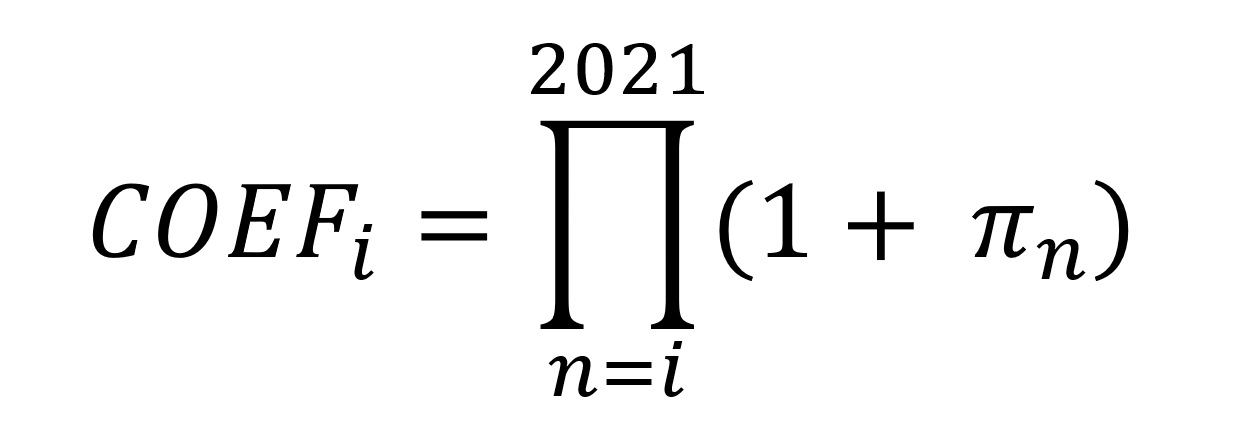

In [119]:
from IPython.display import Image
Image(r'C:\Users\User\Desktop\f.jpg')

где COEF_i - коэффициент, рассчитанный для каждого i-го года (с 1921 по 2020), при умножении на который "старой" стоимости, мы получаем приведенную стоимость той же суммы к текущему моменту, другими словами, данный коэффициент означает сколько долларов стоил бы сегодня доллар, который мы имели в каждом прошедшем i-ом году; pi - темпы инфляции (Inflation Rate) в долях для каждого из прошедших годов.

In [120]:
df2.currency_budget.value_counts()

USD    1428
EUR     152
RUB     118
GBP      16
RUR       6
AUD       5
NOK       5
CAD       4
DKK       3
JPY       2
BRL       2
CNY       2
ATS       1
FRF       1
PLN       1
MXN       1
HUF       1
SEK       1
Name: currency_budget, dtype: int64

In [121]:
# заменим старое обозначение рубля RUR на современное RUB
for i in df2.index:
    if df2.at[i, 'currency_budget'] == 'RUR':
        df2.at[i, 'currency_budget'] = 'RUB'

In [122]:
df2.currency_budget.value_counts()

USD    1428
EUR     152
RUB     124
GBP      16
NOK       5
AUD       5
CAD       4
DKK       3
JPY       2
BRL       2
CNY       2
FRF       1
ATS       1
PLN       1
MXN       1
HUF       1
SEK       1
Name: currency_budget, dtype: int64

In [123]:
df2[df2.currency_budget == 'ATS']

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
27,784,Пианистка,2001,"Эрика - профессор Венской консерватории. Но сама она далека от гармонии небесных сфер. Женщина всё ещё спит в одной кровати со старой матерью, тайно посещает порномагазины и под кроватью держит набор садомазохистских инструментов. Когда же в неё влюбляется один из учеников, она шокирует его своей реакцией и поведением.",18,"Австрия, Германия, Франция","драма, музыка",131,2001,"Интерсинема-Арт, Russian World Vision",70000000.0,ATS,10529.0,6749320.0,15359,19884,49041,15359,412261,2000058,7.2


In [124]:
df2.at[27, 'budget'] = round(df2.at[27, 'budget']/15.3773, 2)

In [125]:
df2.at[27, 'budget']

4552164.55

In [126]:
df2[df2.currency_budget == 'FRF']

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
51,18511,На последнем дыхании,1960,"Мишель Пуакар – настоящий прожигатель жизни, зарабатывающий на жизнь кражами дорогих машин. Он никогда не задумывается о последствиях своих криминальных выходок – просто живет, как хочет, ни на кого не рассчитывая, ни с кем не считаясь. Видимо, потому что молод и самонадеян.\n\nНо однажды, по дороге в Париж, Мишель убивает полицейского: просто для того, чтобы избежать неприятных расспросов. Но с этой минуты в его жизни больше не будет ничего, кроме неприятностей.",16,Франция,"драма, криминал",90,2021,Иноекино,400000.0,FRF,121223.0,351385.0,5683,187577,192614,137173,189279,778241,7.9


In [127]:
df2.at[51, 'budget'] = round(df2.at[51, 'budget']/4.9371, 2)

In [128]:
df2.at[51, 'budget']

81019.22

In [129]:
df2.at[51, 'currency_budget'] = 'USD'
df2.at[27, 'currency_budget'] = 'USD'

Переведем остальные валюты в доллары.

In [130]:
df_infl = pd.read_excel(r"CRIR.xlsx")

In [131]:
df_infl

,year,EUR,RUB,GBP,AUD,NOK,CAD,DKK,JPY,BRL,CNY,PLN,MXN,HUF,SEK,COEF
0,1920,0.770564,3.306000,0.458282,0.767227,6.991573,1.240027,6.027275,266.882500,0.036967,1.725964,2.011283,2.677000,98.211667,4.751883,13.39
1,1921,0.770564,3.306000,0.458282,0.767227,6.991573,1.240027,6.027275,266.882500,0.036967,1.725964,2.011283,2.677000,98.211667,4.751883,14.03
2,1922,0.770564,3.306000,0.458282,0.767227,6.991573,1.240027,6.027275,266.882500,0.036967,1.725964,2.011283,2.677000,98.211667,4.751883,16.03
3,1923,0.770564,3.306000,0.458282,0.767227,6.991573,1.240027,6.027275,266.882500,0.036967,1.725964,2.011283,2.677000,98.211667,4.751883,15.74
4,1924,0.770564,3.306000,0.458282,0.767227,6.991573,1.240027,6.027275,266.882500,0.036967,1.725964,2.011283,2.677000,98.211667,4.751883,15.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.879433,58.067508,0.768517,1.300558,8.238383,1.296067,6.542575,111.919167,3.198533,6.734983,3.733167,18.879308,272.034167,8.483875,1.10
98,2018,0.849358,63.002025,0.752492,1.345450,8.178292,1.299883,6.331692,110.284167,3.680675,6.629225,3.629567,19.241442,271.715000,8.746717,1.07
99,2019,0.894550,64.662283,0.782258,1.437808,8.815575,1.323150,6.680042,108.988333,3.949833,6.901367,3.843625,19.349975,291.517500,9.477867,1.05
100,2020,0.872708,73.449908,0.774342,1.448158,9.390950,1.339975,6.505317,106.350833,5.237058,6.889333,3.896283,21.577050,308.175833,9.135033,1.04


In [132]:
print(df_infl.dtypes.sort_values())

year      int64
EUR     float64
RUB     float64
GBP     float64
AUD     float64
NOK     float64
CAD     float64
DKK     float64
JPY     float64
BRL     float64
CNY     float64
PLN     float64
MXN     float64
HUF     float64
SEK     float64
COEF    float64
dtype: object


In [133]:
df_infl.loc[df_infl['year'] == 2017, 'MXN'].iloc[0]

18.87930833333333

In [134]:
# создадим новый столбец и запишем в него переведенные значения.
for i in df2.index:
    if df2.at[i, 'currency_budget'] != 'USD':
        df2.at[i, 'budget_USD'] =  round(
            df2.at[i, 'budget'] / df_infl.loc[df_infl['year'] == df2.at[i, 'year'], 
                                              df2.at[i, 'currency_budget']].iloc[0], 2)
    else:
        df2.at[i, 'budget_USD'] = df2.at[i, 'budget']

In [135]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget,currency_budget,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",63000000.0,USD,369762.0,463517000.0,23330,7836,1790,23329,278101,310065,8.5,63000000.00
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",94000000.0,USD,9400000.0,936690000.0,32383,20287,32383,32384,225142,1995795,8.6,94000000.00
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,25000000.0,USD,87432.0,28418700.0,24262,7987,102292,24263,258609,1986116,9.1,25000000.00
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",93000000.0,USD,7179830.0,880840000.0,32383,20287,32383,32384,225142,537276,8.6,93000000.00
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,3000000.0,USD,114192.0,108981000.0,20418,30056,10094,179853,118654,9775,8.5,3000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, приключения, семейный",88,2021,UPI,30000000.0,USD,1676170.0,42636200.0,3400706,3022906,6329112,904236,5638209,2010133,5.8,30000000.00

In [136]:
df2 = df2.drop(['budget', 'currency_budget'], axis=1)

In [137]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",369762.0,463517000.0,23330,7836,1790,23329,278101,310065,8.5,63000000.00
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",9400000.0,936690000.0,32383,20287,32383,32384,225142,1995795,8.6,94000000.00
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,87432.0,28418700.0,24262,7987,102292,24263,258609,1986116,9.1,25000000.00
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",7179830.0,880840000.0,32383,20287,32383,32384,225142,537276,8.6,93000000.00
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,114192.0,108981000.0,20418,30056,10094,179853,118654,9775,8.5,3000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, приключения, семейный",88,2021,UPI,1676170.0,42636200.0,3400706,3022906,6329112,904236,5638209,2010133,5.8,30000000.00
1745,1334853,Кольская сверхглубокая,2020,"СССР, канун 1987 года. Молодую эпидемиолога Анну Фёдорову прямо из-за праздни

In [138]:
c = df2.columns

In [139]:
# первый способ поменять колонки местами (ниже есть более лаконичный)
df2[[c[10], c[19]]] = df2[[c[19], c[10]]]
df2[[c[11], c[19]]] = df2[[c[19], c[11]]]
df2[[c[12], c[19]]] = df2[[c[19], c[12]]]
df2[[c[13], c[19]]] = df2[[c[19], c[13]]]
df2[[c[14], c[19]]] = df2[[c[19], c[14]]]
df2[[c[15], c[19]]] = df2[[c[19], c[15]]]
df2[[c[16], c[19]]] = df2[[c[19], c[16]]]
df2[[c[17], c[19]]] = df2[[c[19], c[17]]]
df2[[c[18], c[19]]] = df2[[c[19], c[18]]]

col_list = list(df2)
col_list[10], col_list[19] = col_list[19], col_list[10]
col_list[11], col_list[19] = col_list[19], col_list[11]
col_list[12], col_list[19] = col_list[19], col_list[12]
col_list[13], col_list[19] = col_list[19], col_list[13]
col_list[14], col_list[19] = col_list[19], col_list[14]
col_list[15], col_list[19] = col_list[19], col_list[15]
col_list[16], col_list[19] = col_list[19], col_list[16]
col_list[17], col_list[19] = col_list[19], col_list[17]
col_list[18], col_list[19] = col_list[19], col_list[18]

df2.columns = col_list

df2.head(10)

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",63000000.0,369762.0,463517000.0,23330,7836,1790,23329,278101,310065,8.5
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",94000000.0,9400000.0,936690000.0,32383,20287,32383,32384,225142,1995795,8.6
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,25000000.0,87432.0,28418700.0,24262,7987,102292,24263,258609,1986116,9.1
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",93000000.0,7179830.0,880840000.0,32383,20287,32383,32384,225142,537276,8.6
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,3000000.0,114192.0,108981000.0,20418,30056,10094,179853,118654,9775,8.5
5,342,Криминальное чтиво,1994,"Двое бандитов Винсент Вега и Джулс Винфилд ведут философские беседы в перерывах между разборками и решением проблем с должниками криминального босса Марселласа Уоллеса.\n\nВ первой истории Винсент проводит незабываемый вечер с женой Марселласа Мией. Во второй рассказывается о боксёре Бутче Кулидже, купленном Уоллесом, чтобы сдать бой. В третьей истории Винсент и Джулс по нелепой случайности попадают в неприятности.",18,США,"драма, комедия, криминал, триллер",154,1995,"Аргус-СВ, Каравелла DDC",8000000.0,83843.0,213929000.0,7640,6479,26107,7640,44288,55970,8.6
6,344,Психо,1960,"Мэрион Крэйн недовольна романом с разведенным мужчиной, который уделяет ей внимание только наездами. Поэтому девушка крадет на работе крупную сумму и в спешке бежит из города. Мэрион останавливается

Теперь приведем денежные потоки.

In [140]:
df_infl.loc[df_infl['year'] == 2002, 'COEF'].iloc[0]

1.49

In [141]:
for i in df2.index:
    df2.at[i, 'budget_USD_d'] = round(df2.at[i, 'budget_USD'] * df_infl.loc[df_infl['year'] == df2.at[i, 'year'], 'COEF'].iloc[0], 2)
    df2.at[i, 'rusBO_USD_d']  = round(df2.at[i, 'rusBO_USD'] * df_infl.loc[df_infl['year'] == df2.at[i, 'year'], 'COEF'].iloc[0], 2)
    df2.at[i, 'worldBO_USD_d'] = round(df2.at[i, 'worldBO_USD'] * df_infl.loc[df_infl['year'] == df2.at[i, 'year'], 'COEF'].iloc[0], 2)

In [142]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD,rusBO_USD,worldBO_USD,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD_d,rusBO_USD_d,worldBO_USD_d
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",63000000.00,369762.0,463517000.0,23330,7836,1790,23329,278101,310065,8.5,1.014300e+08,595316.82,7.462624e+08
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",94000000.00,9400000.0,936690000.0,32383,20287,32383,32384,225142,1995795,8.6,1.400600e+08,14006000.00,1.395668e+09
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,25000000.00,87432.0,28418700.0,24262,7987,102292,24263,258609,1986116,9.1,4.525000e+07,158251.92,5.143785e+07
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",93000000.00,7179830.0,880840000.0,32383,20287,32383,32384,225142,537276,8.6,1.413600e+08,10913341.60,1.338877e+09
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,3000000.00,114192.0,108981000.0,20418,30056,10094,179853,118654,9775,8.5,1.497000e+07,569818.08,5.438152e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, при

In [143]:
c = df2.columns

In [144]:
c

Index(['kinopoiskId', 'name', 'year', 'description', 'ratingAgeLimits',
       'countries', 'genres', 'filmLength_mins', 'premiereRu', 'distributors',
       'budget_USD', 'rusBO_USD', 'worldBO_USD', 'director_id', 'actor_id',
       'producer_id', 'writer_id', 'operator_id', 'editor_id',
       'ratingKinopoisk', 'budget_USD_d', 'rusBO_USD_d', 'worldBO_USD_d'],
      dtype='object')

In [145]:
# второй способ поменять колонки местами
df2 = df2[['kinopoiskId', 'name', 'year', 'description', 'ratingAgeLimits',
       'countries', 'genres', 'filmLength_mins', 'premiereRu', 'distributors',
       'budget_USD_d', 'rusBO_USD_d', 'worldBO_USD_d', 'director_id', 'actor_id',
       'producer_id', 'writer_id', 'operator_id', 'editor_id',
       'ratingKinopoisk', 'budget_USD', 'rusBO_USD', 'worldBO_USD']]

In [146]:
df2

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,"Австралия, США","боевик, фантастика",136,1999,"Каро-Премьер, Маурис Филм",1.014300e+08,595316.82,7.462624e+08,23330,7836,1790,23329,278101,310065,8.5,63000000.00,369762.0,463517000.0
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,"Новая Зеландия, США","драма, приключения, фэнтези",179,2003,"Каро-Премьер, UPI",1.400600e+08,14006000.00,1.395668e+09,32383,20287,32383,32384,225142,1995795,8.6,94000000.00,9400000.0,936690000.0
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,США,драма,142,1999,Иноекино,4.525000e+07,158251.92,5.143785e+07,24262,7987,102292,24263,258609,1986116,9.1,25000000.00,87432.0,28418700.0
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,"Новая Зеландия, США","драма, приключения, фэнтези",178,2002,"Каро-Премьер, UPI",1.413600e+08,10913341.60,1.338877e+09,32383,20287,32383,32384,225142,537276,8.6,93000000.00,7179830.0,880840000.0
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,США,драма,133,2021,Иноекино,1.497000e+07,569818.08,5.438152e+08,20418,30056,10094,179853,118654,9775,8.5,3000000.00,114192.0,108981000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,"США, Япония","вестерн, мультфильм, при

In [147]:
df2.shape

(1749, 23)

## Reduction to First Normal Form <a id="s16"></a>

In [148]:
#pip install -U deep_translator

In [149]:
from deep_translator import GoogleTranslator

In [150]:
def binaryTransformation(df, column, ids):
    temp_df = df[column].str.split('\s*,\s*', expand=True).stack().str.get_dummies().sum(level=0)
    result_df = df[[ids]].join(temp_df)
#     display(result_df.head(5))
    translated = GoogleTranslator(source='ru', target='en').translate_batch(result_df.columns.to_list())
    translated_new = [i.replace(' ', '_').replace('-', '_').replace('&', '_').replace(':', '_') for i in translated]
    result_df.set_axis(translated_new, axis=1, inplace=True)
#    display(result_df.head(5))
    return result_df

In [151]:
%%time
countries_df = binaryTransformation(df2, 'countries', 'kinopoiskId')
genres_df = binaryTransformation(df2, 'genres', 'kinopoiskId')
distributors_df = binaryTransformation(df2, 'distributors', 'kinopoiskId')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


Wall time: 40.8 s


In [152]:
countries_df.head(95)

,kinopoiskId,Australia,Austria,Argentina,Armenia,Belarus,Belgium,Bulgaria,Brazil,Great_Britain,Hungary,Venezuela,Ghana,Germany,Hong_Kong,...,Taiwan,Tunisia,Turkey,Ukraine,Uruguay,Finland,France,Croatia,Czech,Chile,Switzerland,Sweden,Ethiopia,South_Africa,Japan
0,301,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,260898,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
91,260991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
92,261018,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
93,261127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [153]:
genres_df.head(5)

,kinopoiskId,anime,biography,thriller,Western_film,military,detective,child,for_adults,documentary,drama,story,comedy,concert,crime,melodrama,music,cartoon,musical,Adventures,family,sport,thriller,horrors,fantasy,film_noir,fantasy
0,301,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,312,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,326,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,336,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
genres_upd_l = genres_df.columns.to_list()
ind_list = [i for i, val in enumerate(genres_upd_l) if val=='thriller']
genres_upd_l[ind_list[0]] = 'action_movie'
genres_df.set_axis(genres_upd_l, axis=1, inplace=True)

In [155]:
genres_df.head(5)

,kinopoiskId,anime,biography,action_movie,Western_film,military,detective,child,for_adults,documentary,drama,story,comedy,concert,crime,melodrama,music,cartoon,musical,Adventures,family,sport,thriller,horrors,fantasy,film_noir,fantasy
0,301,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,312,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,326,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,336,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
new_names = ['kinopoiskId', 'anime', 'biography', 'action_movie', 
             'Western_film', 'military', 'detective', 'child', 
             'for_adults', 'documentary', 'drama', 'history', 'comedy',
             'concert', 'crime', 'melodrama', 'music', 'cartoon', 
             'musical', 'Adventure', 'family', 'sport', 'thriller', 
             'horrors', 'fantastic', 'film_noir', 'fantasy']

In [157]:
genres_df.columns = new_names

In [158]:
genres_df

,kinopoiskId,anime,biography,action_movie,Western_film,military,detective,child,for_adults,documentary,drama,history,comedy,concert,crime,melodrama,music,cartoon,musical,Adventure,family,sport,thriller,horrors,fantastic,film_noir,fantasy
0,301,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,312,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,326,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,336,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
1745,1334853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
1746,1337697,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1747,1347949,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [159]:
distributors_df.head(5)

,kinopoiskId,25th_Floor_Film,A_Company,A_One_Films,ATgroup,All_Media,Bazelevs_Distribution,CD_LAND,CP_Classic,Capella_Film,Cinema_Prestige,CoolConnections,DreamTeam,GP_Group,Indian_films,...,Pioneer,Plan_Project,Planet_Inform,Premium_Movie,Premier_Cinema,Prestige_Cinema,Pro__look,Rocket_Release,Russian_Reporting,Sat_Film,DSS,Kick_scooter,Central_Partnership,Central_Partnership_Classic,Exhibitor
0,301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [160]:
# df2 = 
df2.drop(['countries', 'genres', 'distributors'], axis=1)

,kinopoiskId,name,year,description,ratingAgeLimits,filmLength_mins,premiereRu,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
0,301,Матрица,1999,"Жизнь Томаса Андерсона разделена на две части: днём он — самый обычный офисный работник, получающий нагоняи от начальства, а ночью превращается в хакера по имени Нео, и нет места в сети, куда он бы не смог проникнуть. Но однажды всё меняется. Томас узнаёт ужасающую правду о реальности.",16,136,1999,1.014300e+08,595316.82,7.462624e+08,23330,7836,1790,23329,278101,310065,8.5,63000000.00,369762.0,463517000.0
1,312,Властелин колец: Две крепости,2002,"Братство распалось, но Кольцо Всевластья должно быть уничтожено. Фродо и Сэм вынуждены доверится Голлуму, который взялся провести их к вратам Мордора. Громадная армия Сарумана приближается: члены братства и их союзники готовы принять бой. Битва за Средиземье продолжается.",12,179,2003,1.400600e+08,14006000.00,1.395668e+09,32383,20287,32383,32384,225142,1995795,8.6,94000000.00,9400000.0,936690000.0
2,326,Побег из Шоушенка,1994,"Бухгалтер Энди Дюфрейн обвинён в убийстве собственной жены и её любовника. Оказавшись в тюрьме под названием Шоушенк, он сталкивается с жестокостью и беззаконием, царящими по обе стороны решётки. Каждый, кто попадает в эти стены, становится их рабом до конца жизни. Но Энди, обладающий живым умом и доброй душой, находит подход как к заключённым, так и к охранникам, добиваясь их особого к себе расположения.",16,142,1999,4.525000e+07,158251.92,5.143785e+07,24262,7987,102292,24263,258609,1986116,9.1,25000000.00,87432.0,28418700.0
3,328,Властелин колец: Братство Кольца,2001,"Сказания о Средиземье — это хроника Великой войны за Кольцо, длившейся не одну тысячу лет. Тот, кто владел Кольцом, получал неограниченную власть, но был обязан служить злу. \n\nТихая деревня, где живут хоббиты. Придя на 111-й день рождения к своему старому другу Бильбо Бэггинсу, волшебник Гэндальф начинает вести разговор о кольце, которое Бильбо нашел много лет назад. Это кольцо принадлежало когда-то темному властителю Средиземья Саурону, и оно дает большую власть своему обладателю. Теперь Саурон хочет вернуть себе власть над Средиземьем. Бильбо отдает Кольцо племяннику Фродо, чтобы тот отнёс его к Роковой Горе и уничтожил.",12,178,2002,1.413600e+08,10913341.60,1.338877e+09,32383,20287,32383,32384,225142,537276,8.6,93000000.00,7179830.0,880840000.0
4,336,Пролетая над гнездом кукушки,1975,"Рэндла Патрика Макмёрфи, патологического преступника и бунтаря, переводят из колонии в психиатрическую клинику, чтобы установить, является он душевнобольным или нет. В клинике он обнаруживает, что отделение контролирует хладнокровная, строгая и одержимая распорядком старшая медсестра Милдред Рэтчед. Макмёрфи намерен не подчиняться абсурдным, на его взгляд, правилам и одновременно повеселиться от души. Его бунтарская натура заражает других пациентов, но сестра Рэтчед решительно настроена пресечь это.",18,133,2021,1.497000e+07,569818.08,5.438152e+08,20418,30056,10094,179853,118654,9775,8.5,3000000.00,114192.0,108981000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,Спирит Непокорный,2021,"Лаки Прескотт — юная бунтарка, совсем как ее мама, легендарная бесстрашная наездница, которую дочь почти не помнит. После очередной шалости заботливая тетушка Кора, вырастившая девочку, отправляет ее жить к отцу. Теперь все, о чем мечтает Лаки — вырваться на волю из крошечного сонного городка. Все меняется, когда она знакомится со Спиритом — диким мустангом, таким же упрямым и независимым, как и она сама.",6,88,2021,3.000000e+07,1676170.00,4.263620e+07,3400706,3022906,6329112,904236,5638209,2010133,5.8,30000000.00,1676170.0,42636200.0
1745,1334853,Кольская сверхглубокая,2020,"СССР, канун 1987 года. Молодую эпидемиолога Анну Фёдорову прямо из-за праздничного стола вызывают в командировку. Ей предстоит отправиться на Кольскую сверхгл

<a id='s12'></a>

## Transferring Data to MySQL

In [152]:
cur_data.execute('''
    CREATE TABLE IF NOT EXISTS movies_upd (
        kinopoiskId       INTEGER UNIQUE NOT NULL PRIMARY KEY,
        name              TEXT,
        year              INT,
        description       TEXT,
        ratingAgeLimits   INT,
        countries         TEXT,
        genres            TEXT,
        filmLength_mins   INT, 
        premiereRu        INT,
        distributors      TEXT,
        budget_USD        FLOAT,
        rusBO_USD         FLOAT,
        worldBO_USD       FLOAT,
        budget_USD_d      FLOAT,
        rusBO_USD_d       FLOAT,
        worldBO_USD_d     FLOAT,
        director_id       INT,
        actor_id          INT,
        producer_id       INT,
        writer_id         INT,
        operator_id       INT,
        editor_id         INT,
        ratingKinopoisk   FLOAT
    );
''')
conn_data.commit()

In [150]:
def fillTableSQL(df, table):
    create_db_query = '''INSERT INTO {} ({})
                         VALUES ({})'''.format(table, ', '.join(df.columns), 
                                               ', '.join(['%s' for i in range(len(df.columns))]))
#     print(create_db_query)
    for r in range(df.shape[0]):
        values = tuple(np.where(pd.isnull(df.values[r]) == True, None, df.values[r]))
        cur_data.execute(create_db_query, values)

In [149]:
# deleting dfs
# create_db_query = "DROP TABLE staff_upd"
# cur_data.execute(create_db_query)

In [153]:
fillTableSQL(df2, 'movies_upd')
conn_data.commit()

In [154]:
staff

,staff_id,nameRu,nameEn,webUrl,birthday,sex,birthplace,hasAwards,profession
0,4,Кейси Аффлек,Casey Affleck,https://www.kinopoisk.ru/name/4/,1975-08-12,MALE,"Фолмут, Массачусетс, США",1,"Актер, Продюсер, Сценарист"
1,7,Люк Уилсон,Luke Wilson,https://www.kinopoisk.ru/name/7/,1971-09-21,MALE,"Даллас, Техас, США",1,"Актер, Продюсер, Режиссер"
2,52,Нил Х. Мориц,Neal H. Moritz,https://www.kinopoisk.ru/name/52/,1959-06-06,MALE,"Лос-Анджелес, Калифорния, США",1,"Продюсер, Актер"
3,55,Джон Стокуэлл,John Stockwell,https://www.kinopoisk.ru/name/55/,1961-03-25,MALE,"Гэлвстоун, Техас, США",0,"Актер, Режиссер, Сценарист"
4,56,Фил Хэй,Phil Hay,https://www.kinopoisk.ru/name/56/,None,MALE,None,0,"Сценарист, Продюсер, Актер"
...,...,...,...,...,...,...,...,...,...
15460,6559601,,Paul Ashdown,https://www.kinopoisk.ru/name/6559601/,None,MALE,None,0,None
15461,6565298,Лоик Гузер,Loïc Gouzer,https://www.kinopoisk.ru/name/6565298/,None,MALE,None,0,None
15462,10153102,Хайят Мокенаке,Hayat Mokhenache,https://www.imdb.com/name/nm10153102/,None,FEMALE,None,0,Капитан корабля
15463,10153103,Вячеслав Тарасов,Vyacheclav Tarasov,https://www.kino-teatr.ru/kino/painter/post/382397/works/,1938-10-17,MALE,"Ростов-Ярославский, Беларусь",0,"Продюсер, Художник-Постановщик"


In [155]:
conn_data = connect(host="localhost",
                    user='root',
                    password='Kinopoisk231.',
                    database='kinopoisk_movies')
cur_data = conn_data.cursor(buffered=True)

In [156]:
cur_data.execute('''
    CREATE TABLE IF NOT EXISTS staff_upd (
        staff_id INTEGER UNIQUE NOT NULL PRIMARY KEY,
        nameRu TEXT,
        nameEn TEXT,
        webUrl TEXT,
        birthday TEXT,
        sex TEXT,
        birthplace TEXT,
        hasAwards TEXT,
        profession TEXT
    );
''')
# conn_data.commit()

In [157]:
conn_data = connect(host="localhost",
                    user='root',
                    password='Kinopoisk231.',
                    database='kinopoisk_movies')
cur_data = conn_data.cursor(buffered=True)

In [158]:
%%time
fillTableSQL(staff, 'staff_upd')
# conn_data.commit()

Wall time: 3min 54s


In [159]:
staff = ['director', 'actor', 'producer', 'writer', 'operator', 'editor']

for s in staff:
    create_db_query = '''ALTER TABLE movies_upd
                         ADD CONSTRAINT FOREIGN KEY (`{}_id`)
                         REFERENCES staff_upd (`staff_id`);'''.format(s)
    cur_data.execute(create_db_query)
    
conn_data.commit()

In [160]:
def createTable(df, table_name):
    columns_list = df.columns.to_list()
    create_table_query = []
    for i in range(len(columns_list)):
        if i == 0:
            create_table_query.append(columns_list[i] + ' INTEGER UNIQUE NOT NULL PRIMARY KEY')
        else:
            create_table_query.append(columns_list[i] + ' BINARY')
    table_query = '''CREATE TABLE IF NOT EXISTS {} ({});'''.format(table_name, ',\n'.join(create_table_query))
#     print(table_query)
    cur_data.execute(table_query)

In [161]:
createTable(countries_df, 'countries')
createTable(genres_df, 'genres')
createTable(distributors_df, 'distributors')
conn_data.commit()

In [162]:
fillTableSQL(countries_df, 'countries')
fillTableSQL(genres_df, 'genres')
fillTableSQL(distributors_df, 'distributors')
conn_data.commit()

In [163]:
tables = ['countries', 'genres', 'distributors']

for t in tables:
    create_db_query = '''ALTER TABLE movies_upd
                         ADD CONSTRAINT FOREIGN KEY (`kinopoiskId`)
                         REFERENCES {} (`kinopoiskId`);'''.format(t)
    cur_data.execute(create_db_query)
    
conn_data.commit()

<a id='s13'></a>

## Visualization pt.1 and Analysis

Заглянем поглубже в структуру данных

In [161]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
#import plotly.express as px

In [162]:
from scipy import misc
from matplotlib import cm

In [166]:
#pip install seaborn --upgrade

In [167]:
df2[['year', 'ratingAgeLimits', 'filmLength_mins', 'premiereRu', 
     'budget_USD_d', 'rusBO_USD_d', 'worldBO_USD_d', 'ratingKinopoisk']].describe()

,year,ratingAgeLimits,filmLength_mins,premiereRu,budget_USD_d,rusBO_USD_d,worldBO_USD_d,ratingKinopoisk
count,1749.000000,1749.000000,1749.000000,1749.000000,1.749000e+03,1.749000e+03,1.749000e+03,1749.000000
mean,2013.878788,14.773013,110.227559,2014.881075,4.749385e+07,5.306533e+06,1.563792e+08,6.436878
std,6.596420,3.839075,19.220975,3.577778,6.095829e+07,8.951597e+06,2.892622e+08,1.006390
min,1921.000000,0.000000,63.000000,1991.000000,7.542487e+04,3.531000e+01,7.223300e+02,1.100000
25%,2012.000000,12.000000,97.000000,2012.000000,7.577387e+06,2.885452e+05,6.195022e+06,5.900000
50%,2014.000000,16.000000,107.000000,2015.000000,2.310000e+07,1.472352e+06,4.584987e+07,6.500000
75%,2017.000000,18.000000,120.000000,2017.000000,5.650000e+07,6.280990e+06,1.683922e+08,7.100000
max,2021.000000,18.000000,272.000000,2021.000000,3.738000e+08,7.576730e+07,3.078612e+09,9.100000


Самый длинный фильм в выборке - 4 часа 32 минуты, максимальный бюджет - 773 800 000 USD, минимальный - 75 424 USD. Максимальные российские сборы - 75 767 300 USD, минимальные - 35 USD. Мировые максимальные и минимальные соответственно равны 3 078 621 000 USD и 722 USD. Наивысшая оценка, присвоенная зрителями на Кинопоиске 9.1, минимальная 1.1.

In [168]:
pd.crosstab(df2['ratingKinopoisk'] > 6.5, df2['ratingAgeLimits'])

ratingAgeLimits,0,6,12,16,18
ratingKinopoisk,,,,,
False,12,44,153,413,261
True,26,70,183,375,212


Сложно сказать с определенностью, так как выборка очевидно смещена (намного больше фильмов 16+ и 18+), но моэно сказать, что детские картины (12 и меньше), получают средне высокие рейтинги чаще, чем взрослые фильмы. Хотя, это может быть и сммещением выборки - из-за большого количества взрослых фильмов их часть может быть более репрезентативна.

In [169]:
from matplotlib import cm

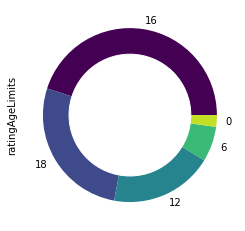

In [170]:
colors = cm.viridis(np.linspace(0, 100, 443))
df2.ratingAgeLimits.value_counts().plot(kind='pie', colors=colors)
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.7, color='white'))
plt.show()

In [171]:
#import plotly.graph_objects as go
#labels = df2['ratingAgeLimits'].value_counts().index
#values = df2['ratingAgeLimits'].value_counts().values
#fig = go.Figure(data=[go.Pie(labels=labels,
 #                            values=values)])
#fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
 #                 marker=dict(line=dict(color='#000000', width=2)))

#fig.update_layout(
 #   title={
  #      'text': "Rating Age Limits",
   #     'y':0.9,
    #    'x':0.5,
     #   'xanchor': 'center',
      #  'yanchor': 'top'})

#fig.show()

In [172]:
# у какого фильма самые большие сборы в России? Пираты Карибского моря!!! Очень классный фильм.
df2[df2['rusBO_USD_d'] == df2.rusBO_USD_d.max()]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
169,427076,Пираты Карибского моря: На странных берегах,2011,"В новой истории о поисках истины, предательстве, вечной молодости и смертельной опасности капитану Джеку Воробью предстоит столкнуться с женщиной из своего прошлого Анжеликой. До самого конца не будет понятно, связывает ли их настоящая любовь, или же Анжелика искусно притворяется, чтобы вместе с Джеком добраться до таинственного источника вечной молодости. \n\nОна силой принуждает капитана Джека Воробья взойти на корабль «Месть Королевы Анны», которым управляет коварный злодей Черная Борода. Наш герой оказывается в ситуации, когда он не знает, чего ему бояться больше – ужасного злодея или же свою давнюю подругу.",12,"Великобритания, США","боевик, комедия, приключения, фэнтези",136,2011,WDSSPR,297500000.0,75767300.0,1.244395e+09,36060,6245,10207,30871,611243,2004040,7.3,250000000.0,63670000.0,1.045710e+09


In [173]:
# у какого фильма из датасета самые большие сборы в мире? Титаник. Тоже оправдано.
df2[df2['worldBO_USD_d'] == df2.worldBO_USD_d.max()]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
29,2213,Титаник,1997,"В первом и последнем плавании шикарного «Титаника» встречаются двое. Пассажир нижней палубы Джек выиграл билет в карты, а богатая наследница Роза отправляется в Америку, чтобы выйти замуж по расчёту. Чувства молодых людей только успевают расцвести, и даже не классовые различия создадут испытания влюблённым, а айсберг, вставший на пути считавшегося непотопляемым лайнера.",12,"Австралия, Канада, Мексика, США","драма, история, мелодрама, триллер",194,1998,"Гемини, Двадцатый Век Фокс СНГ",334000000.0,30728000.0,3.078612e+09,27977,37859,27977,27977,408797,603677,8.4,200000000.0,18400000.0,1.843480e+09


In [174]:
# у каких фильмов такой же бюджет, как у фильма с самым большим бюджетом в 2010 году? Равнх Началу нет!
df2[df2['budget_USD_d'] == df2[df2.year == 2010].budget_USD_d.max()]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
203,447301,Начало,2010,"Кобб – талантливый вор, лучший из лучших в опасном искусстве извлечения: он крадет ценные секреты из глубин подсознания во время сна, когда человеческий разум наиболее уязвим. Редкие способности Кобба сделали его ценным игроком в привычном к предательству мире промышленного шпионажа, но они же превратили его в извечного беглеца и лишили всего, что он когда-либо любил. \n\nИ вот у Кобба появляется шанс исправить ошибки. Его последнее дело может вернуть все назад, но для этого ему нужно совершить невозможное – инициацию. Вместо идеальной кражи Кобб и его команда спецов должны будут провернуть обратное. Теперь их задача – не украсть идею, а внедрить ее. Если у них получится, это и станет идеальным преступлением. \n\nНо никакое планирование или мастерство не могут подготовить команду к встрече с опасным противником, который, кажется, предугадывает каждый их ход. Врагом, увидеть которого мог бы лишь Кобб.",12,"Великобритания, США","боевик, детектив, драма, триллер, фантастика",148,2010,Каро-Премьер,196800000.0,81318.99,1.018836e+09,41477,37859,41477,41477,608613,2354627,8.7,160000000.0,66113.0,828322000.0


In [175]:
# самый большой бюджет из фильмов 2000го года выпуска у фильма ....
#df2[df2['budget'] == df2.budget.max()]
df2[df2['year'] == 2000][df2['budget_USD_d'] == df2[df2['year'] == 2000].budget_USD_d.max()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
26,646,Танцующая в темноте,2000,"Иммигрантка из Чехословакии Сельма, которая очень любит мюзиклы, работает на заводе и живёт с сыном в съёмном трейлере. У Сельмы тяжёлая болезнь, из-за которой она теряет зрение. Этот же недуг поражает и её сына. Сельма скрывает свою болезнь и пытается работать вслепую, чтобы заработать деньги, необходимые для лечения сына.",18,"Аргентина, Великобритания, Германия, Дания, Исландия, Испания, Италия, Нидерланды, Норвегия, США, Финляндия, Франция, Швеция","драма, криминал, мюзикл",140,2000,"Интерсинема-Арт, Русский Репортаж",19968000.0,780000.0,62449764.0,31951,55267,31965,31951,162001,1673171,7.9,12800000.0,500000.0,40031900.0


In [176]:
# самый маленький бюджет у ..... российского фильма. ожидаемо.
df2[df2['budget_USD_d'] == df2.budget_USD_d.min()]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
777,617329,Стальная бабочка,2012,"Беглые беспризорники во главе с юной Чумой зарабатывают на пропитание дерзкими ограблениями. Попавшись в очередной раз на разбое, Чума вынуждена под давлением полиции стать живой приманкой для серийного убийцы. Если она пополнит список жертв, искать ее никто не станет. \n\nПочерк маньяка одинаков, все девушки похожи, а место охоты – лесной массив на окраине Москвы. Для опера Ханина поимка монстра не просто вопрос чести, но и цена погон. А для Чумы – цена свободы. Общая цель сближает юную беспризорницу и взрослого циничного опера.",16,Россия,"детектив, драма, криминал",107,2012,Каропрокат,75424.87,1385280.0,1328616.9,277020,1574780,277020,231447,1936803,2342985,7.0,64465.7,1184000.0,1135570.0


In [177]:
# самый большой бюджет у Мсителей, конечно. Вселенная Марвел неимоверно дорогая
df2[df2['budget_USD_d'] == df2.budget_USD_d.max()]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
1289,843650,Мстители: Финал,2019,"Оставшиеся в живых члены команды Мстителей и их союзники должны разработать новый план, который поможет противостоять разрушительным действиям могущественного титана Таноса. После наиболее масштабной и трагической битвы в истории они не могут допустить ошибку.",16,США,"боевик, драма, приключения, фантастика",181,2019,WDSSPR,373800000.0,49822605.0,2.937375e+09,40181,10096,8283,477114,995156,554240,7.7,356000000.0,47450100.0,2.797500e+09


In [178]:
# очень забавно, что оба из двух фильмов с самым низким рейтингом российского производства
df2[df2['ratingKinopoisk'] == df2.ratingKinopoisk.min()]

,kinopoiskId,name,year,description,ratingAgeLimits,countries,genres,filmLength_mins,premiereRu,distributors,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD,rusBO_USD,worldBO_USD
132,408888,Мантикора,2011,"На ночных дорогах Москвы опасно – одна за другой происходят таинственные аварии, в результате которых погибают люди. И каждый раз на месте аварий видят странные черные машины. Давнее соперничество между стритрейсерами и профессиональными автогонщикам разгорается с новой силой.\n\nГлавная героиня – независимая современная девушка, лидер группы ночных гонщиков, оказывается втянутой в смертельную игру.",16,Россия,триллер,110,2011,Каропрокат,7140000.0,2090246.90,1983254.00,1572499,659728,1951059,1572499,290339,1572499,1.1,6000000.0,1756510.0,1666600.0
937,689077,Кавказская пленница!,2014,"Журналист Шурик приезжает на Кавказ, чтобы снять репортаж о местных красотах и традициях, и попадает в Горск, вотчину местного мэра города Георгия Гаджиевича Саахова. Тот, поддерживая моду, заданную губернатором, задумал жениться на молоденькой красавице, спортсменке и даже экстремалке Нине, которая так понравилась Шурику. Используя незадачливого журналиста, Саахов и его подручные похищают Нину. Но, поняв, что его разыграли, Шурик бросается спасать любимую девушку…",12,Россия,комедия,95,2014,DreamTeam,3955000.0,203222.59,329695.58,276860,1613529,276860,3673646,3673647,2896229,1.1,3500000.0,179843.0,291766.0


Text(0, 0.5, 'Размер вложений')

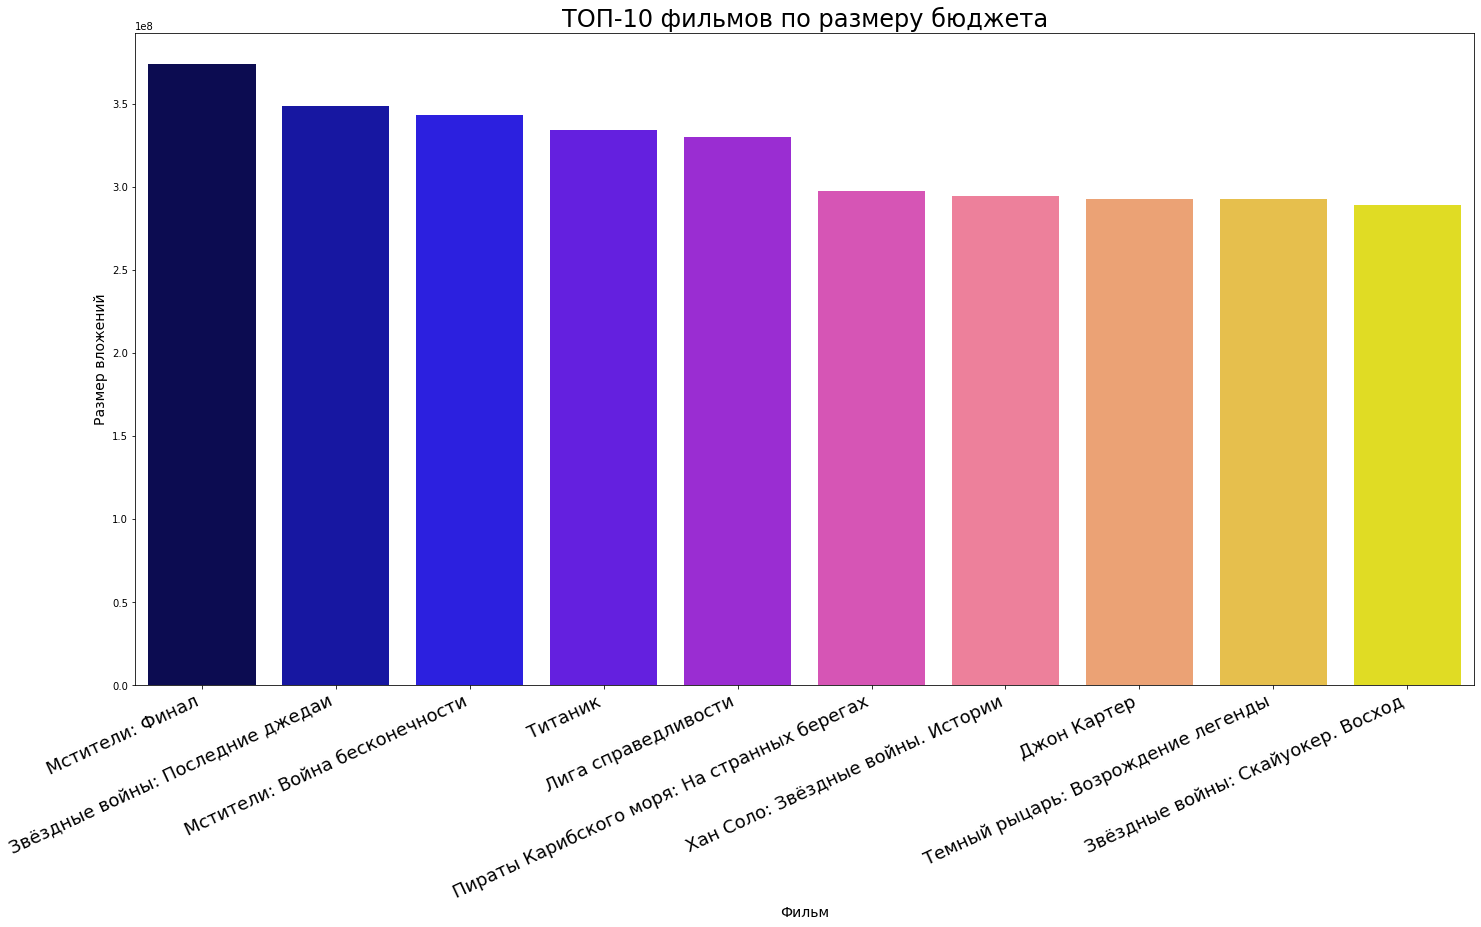

In [179]:
plt.figure(figsize=[24, 12])
duplicate_f = df2.copy()
duplicate_f.drop_duplicates(subset ='name', 
                     keep = 'first', inplace = True)
#Plotting bar plot               
top10_bdg=duplicate_f[['name', 'budget_USD_d']].sort_values(by = 'budget_USD_d', ascending = False).head(10)
ax=sns.barplot(x='name', y='budget_USD_d', data=top10_bdg, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=25, ha="right")
ax.set_title('TОП-10 фильмов по размеру бюджета',fontsize = 24)
ax.set_xlabel('Фильм', fontsize = 14) 
ax.set_ylabel('Размер вложений', fontsize = 14)

Text(0, 0.5, 'Рейтинг')

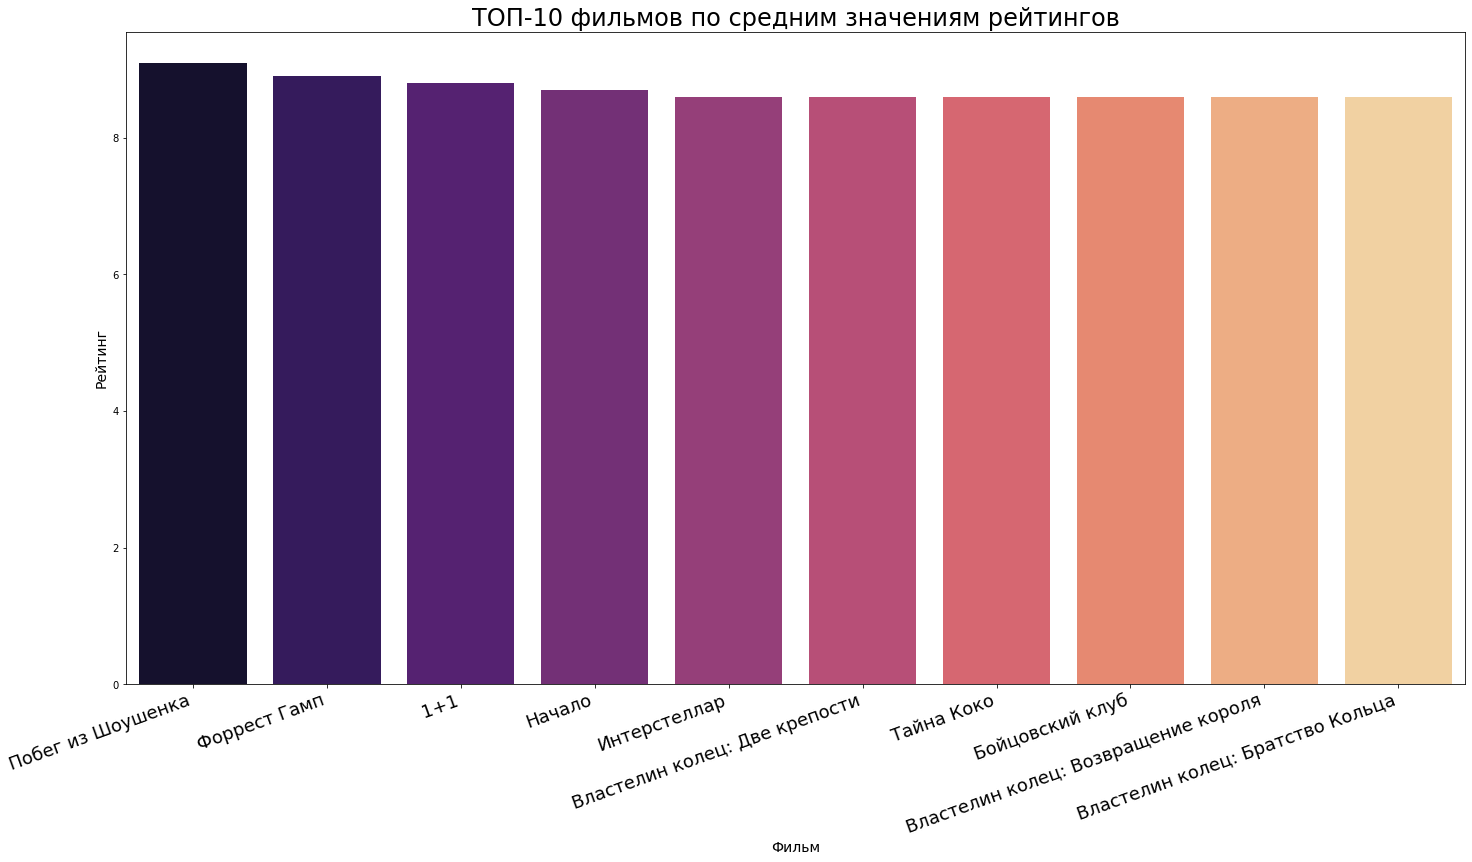

In [180]:
plt.figure(figsize=[24, 12])
s = df2.groupby('name')['ratingKinopoisk'].mean().sort_values(ascending=False).head(10).reset_index()

ax = sns.barplot(x = 'name', y = "ratingKinopoisk", data = s, palette="magma")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=20, ha="right")
ax.set_title("ТОП-10 фильмов по средним значениям рейтингов", fontsize = 24)
ax.set_xlabel('Фильм', fontsize = 14) 
ax.set_ylabel('Рейтинг', fontsize = 14)

Оценим визуально смещенность данных в выборке.

In [181]:
from scipy import stats

array([[<AxesSubplot:title={'center':'budget_USD_d'}>,
        <AxesSubplot:title={'center':'rusBO_USD_d'}>,
        <AxesSubplot:title={'center':'worldBO_USD_d'}>],
       [<AxesSubplot:title={'center':'filmLength_mins'}>,
        <AxesSubplot:title={'center':'ratingKinopoisk'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'premiereRu'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

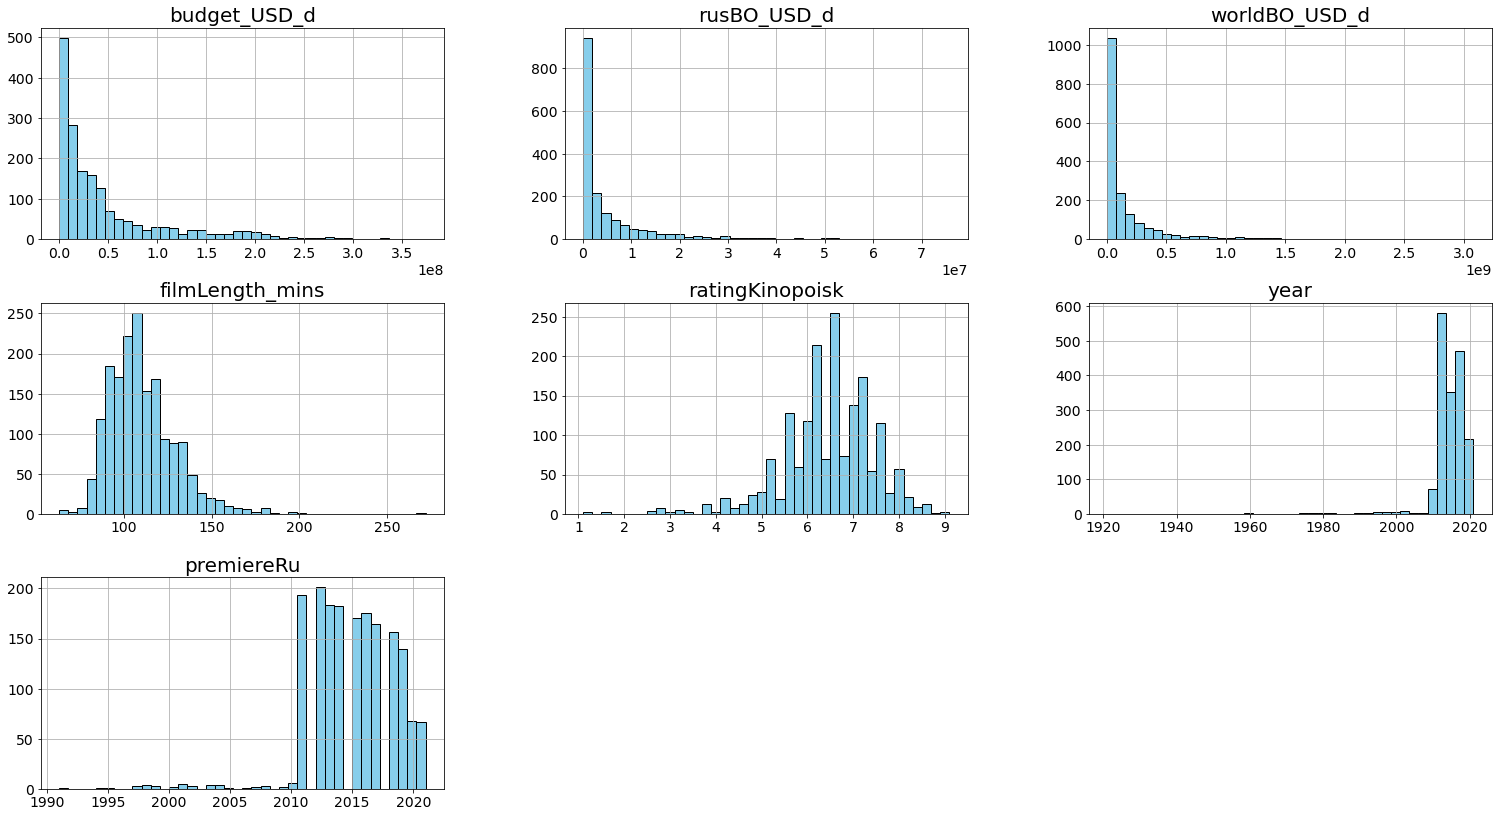

In [182]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
mpl.rcParams.update(params)

df2[['budget_USD_d'] + ['rusBO_USD_d'] + ['worldBO_USD_d'] +
    ['filmLength_mins'] + ['ratingKinopoisk'] + 
    ['year'] + ['premiereRu']].hist(layout=(3, 3), 
                                    figsize=(26, 14), 
                                    color='skyblue', 
                                    ec='black',
                                    bins=40)

Подавляющее большинство фильмов в выборке 2017-2019 годов выхода. По длительности в среднем фильмы короче 1,5 часов. Большая часть около 100-120 минут. Наиболее распространенный рейтинги умеренные - между 6 и 7 баллами из 10.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

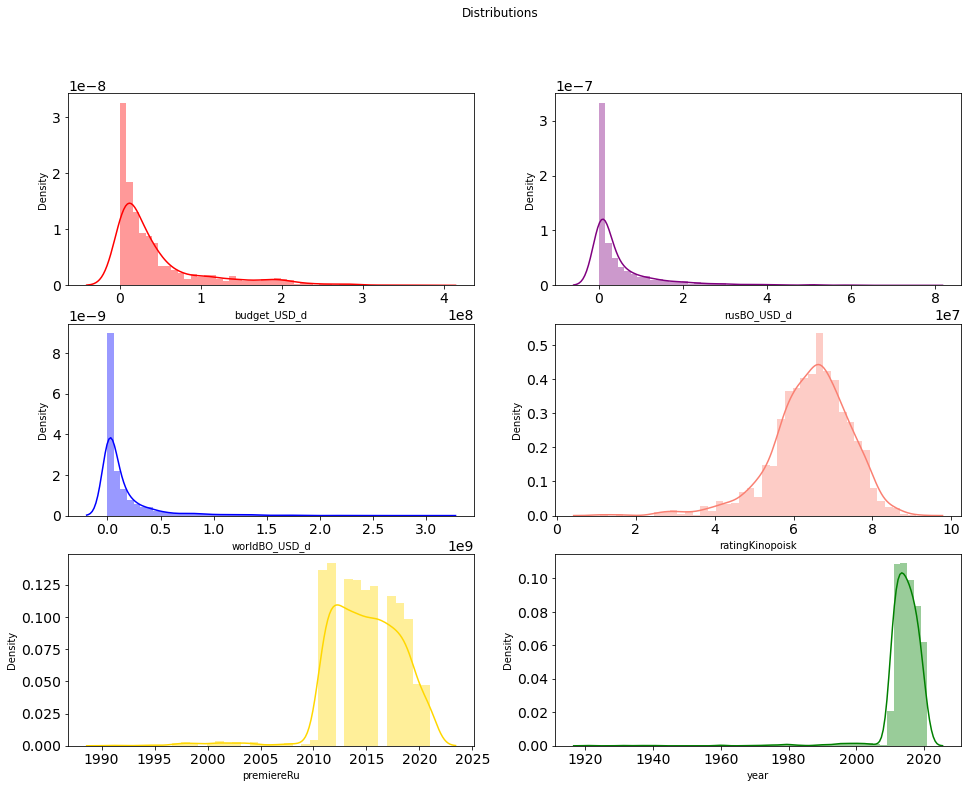

In [183]:
# plt.figure(figsize=(12, 12))
f, axes = plt.subplots(3, 2, figsize=(16, 12))

sns.distplot(df2['budget_USD_d'], ax=axes[0, 0], color='r')

sns.distplot(df2['rusBO_USD_d'], ax=axes[0, 1], color='purple')

sns.distplot(df2['worldBO_USD_d'], ax=axes[1, 0], color='b')

sns.distplot(df2['premiereRu'], ax=axes[2, 0], color='gold')

sns.distplot(df2['year'], ax=axes[2, 1], color='g')

sns.distplot(df2['ratingKinopoisk'], ax=axes[1, 1], color='salmon')
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
f.suptitle('Distributions')
# axes[0].set_title('Title of the first chart')
plt.show()

<AxesSubplot:>

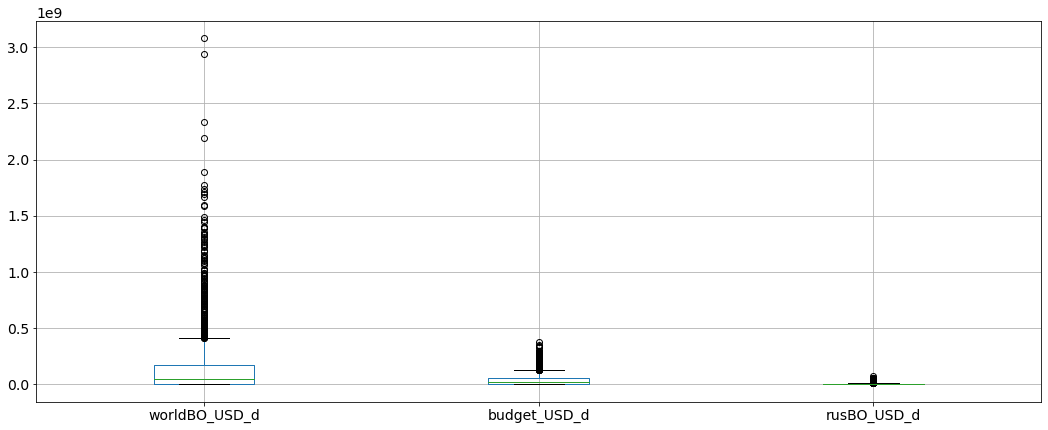

In [184]:
plt.figure(figsize=(18,7))
df2.boxplot(column=['worldBO_USD_d', 'budget_USD_d', 'rusBO_USD_d'])

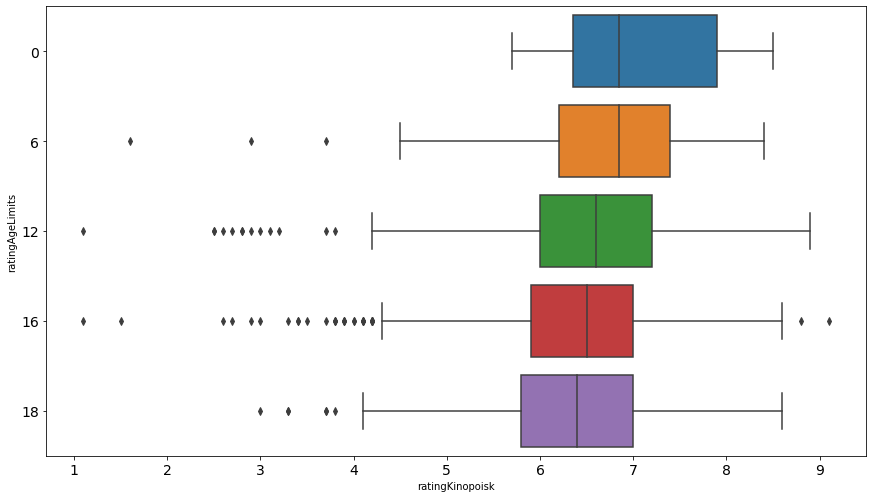

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
ax = sns.boxplot(y="ratingAgeLimits", x="ratingKinopoisk", data=df2, orient="h")

array([[<AxesSubplot:title={'center':'budget_USD_d'}>],
       [<AxesSubplot:title={'center':'rusBO_USD_d'}>],
       [<AxesSubplot:title={'center':'worldBO_USD_d'}>]], dtype=object)

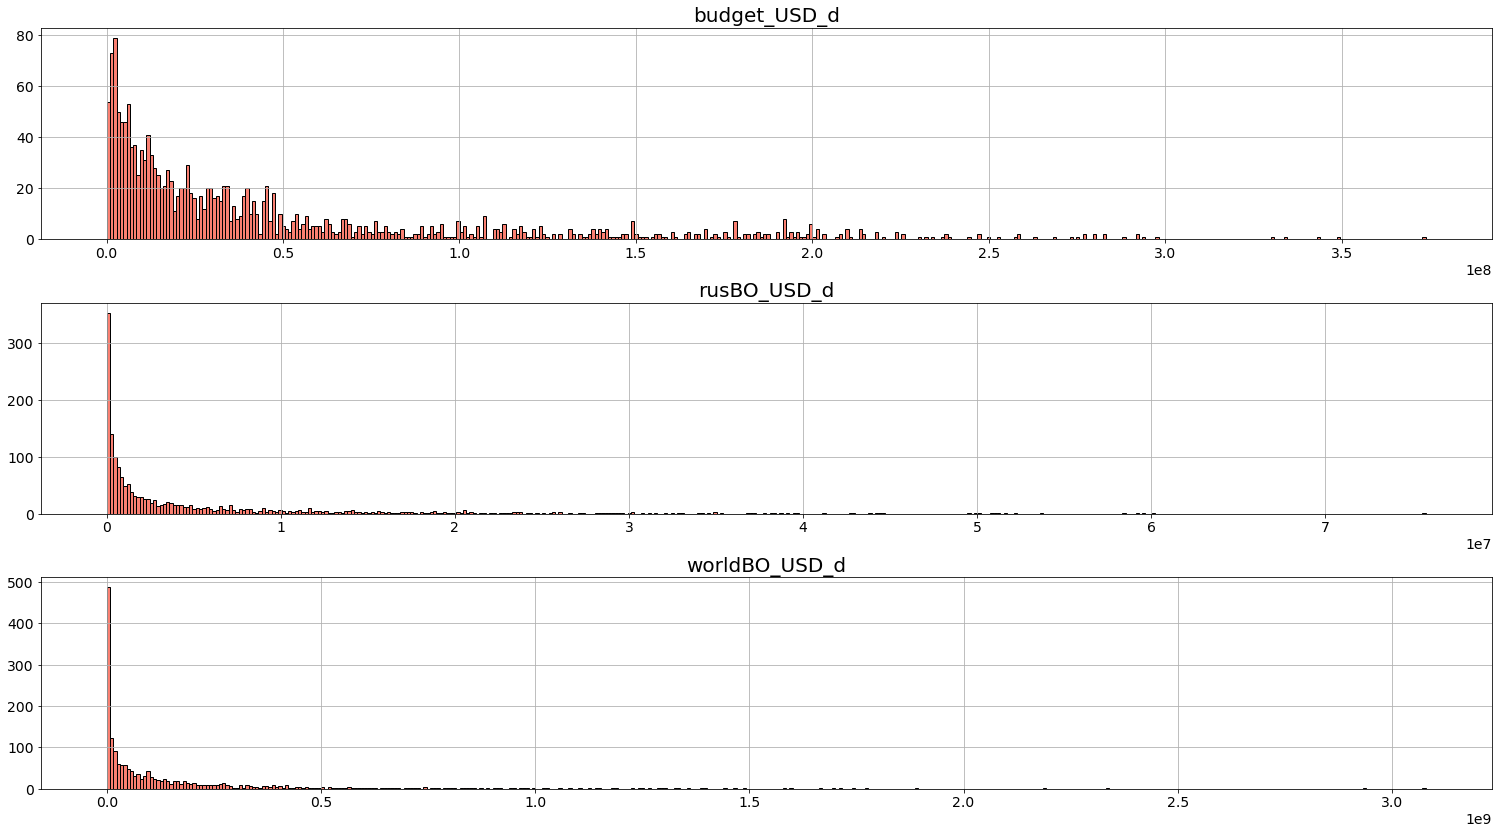

In [186]:
# посмотрим ближе на крупные денежные параметры
df2[['budget_USD_d'] + ['rusBO_USD_d'] + ['worldBO_USD_d']].hist(layout=(3, 1), 
                                    figsize=(26, 14), 
                                    color='salmon', 
                                    ec='black',
                                    bins=400)

Большая часть бюджетов и сборов сосредоточена в диапазон менее 10 млн долларов. Но есть и выдающиеся дорогие кинокартины.

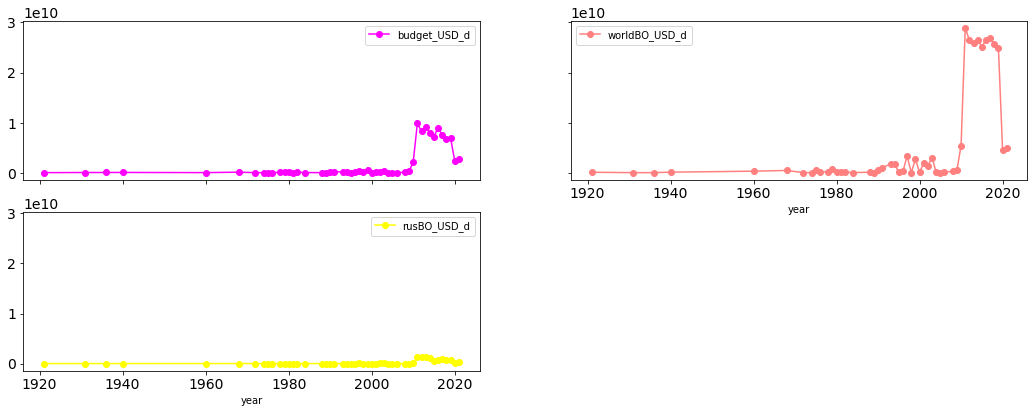

In [187]:
df2[['budget_USD_d', 'worldBO_USD_d', 'rusBO_USD_d', 'year']].groupby('year').sum().plot(subplots=True, 
                                layout=(7, 2), 
                                sharex=True, 
                                sharey=True,
                                figsize=(18,24),
                                linestyle='-', 
                                marker='o',
                                cmap=cm.spring)
plt.show()

Суммарные бюджеты и сборы по годам заметно выросли в 21 веке. Конечно, российские сборы фильмов претерпели значительно меньший скачок, нежели мировые. Также отмечается падение бюджетовв 2020-2021 годах, но не их абсолютных значений, а суммарных значений, так как в выборке не так много фильмов, выдеших в этот период.

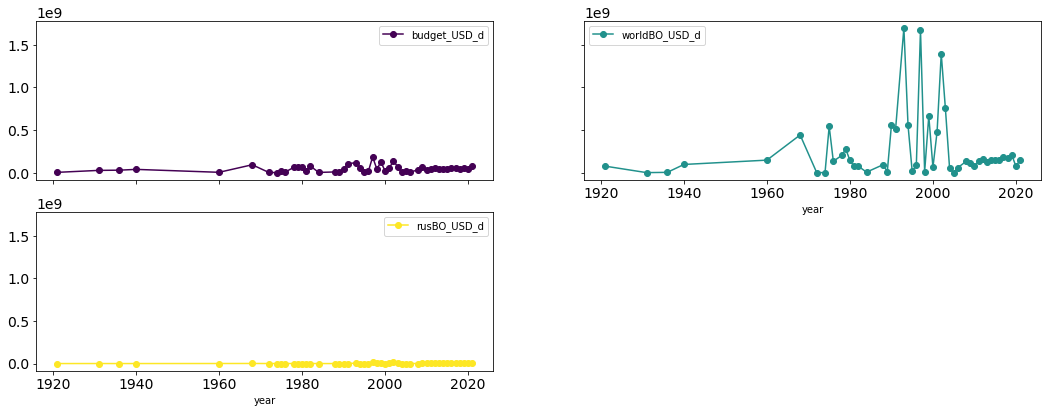

In [188]:
df2[['budget_USD_d', 'worldBO_USD_d', 'rusBO_USD_d', 'year']].groupby('year').mean().plot(subplots=True, 
                                layout=(7, 2), 
                                sharex=True, 
                                sharey=True,
                                figsize=(18,24),
                                linestyle='-', 
                                marker='o',
                                cmap=cm.viridis)
plt.show()

Среднее знаечение по годам более репрезентативно. Отмечается небольшой рост и бюджетов и мировых сборов (что, логично, если бы было наоборот, то это означало бы, что кинематограф не окупается и индустрию ждет упадок), рост российских сборов почти не наблюдается.

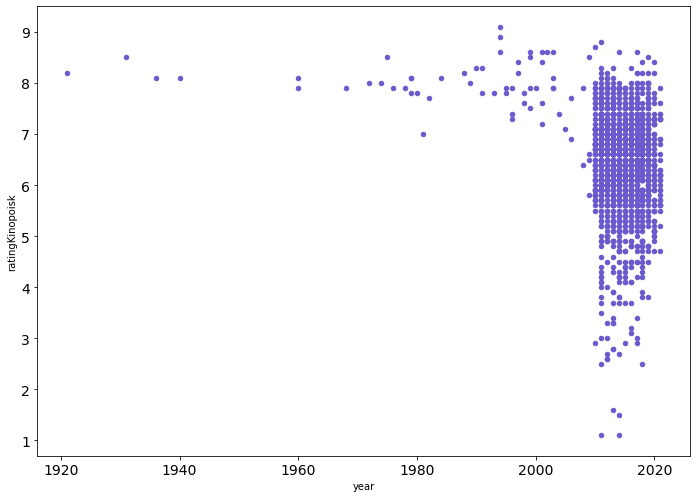

In [189]:
df2.plot.scatter(x='year', y='ratingKinopoisk', figsize=(11.7, 8.27), color='slateblue')
plt.show()

На данном графике видно, насколько данные смещены во времени в период 2010-2020 годов. Также заметно, что с появлением большего количества фильмов стало появляться больше отрицательныз отзывов. 

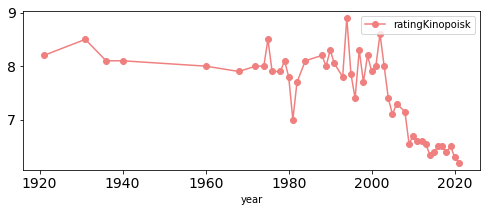

In [190]:
df2[['ratingKinopoisk', 'year']].groupby('year').median().plot(subplots=True, 
                                layout=(7, 2), 
                                sharex=True, 
                                sharey=True,
                                figsize=(18,24),
                                linestyle='-', 
                                marker='o',
                                color='lightcoral')
plt.show()

Медианные значения рейтингов по годам падают - критиков все больше и больше!!

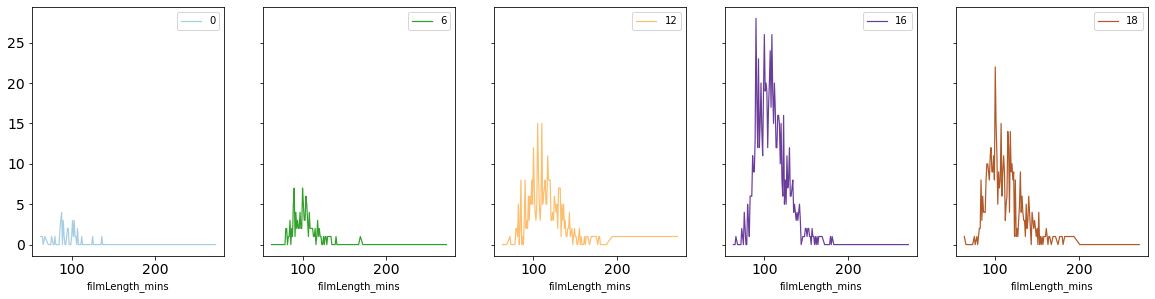

In [191]:
pd.crosstab(df2['filmLength_mins'], df2['ratingAgeLimits']).plot(subplots=True, layout=(10, 5), sharex=True, sharey=True,
                                                    figsize=(20, 54), linewidth=1.2, cmap=cm.Paired)
plt.show()

По данному графику можно наблюдать, что фильмы для взрослой аудитории длиннее, чем для детей. Ссамая распространенная продолжительность все равно дает о себе знать и большинство картин остаются в рамках 2 часов, но для малышей вообще нет таких длинных фильмов, как для взрослых. Видно только одно исключение для категории 6+.

In [192]:
df_new = pd.read_sql('''SELECT * FROM kinopoisk_movies.movies m ''', con=conn_data)
df_new['nan_exist'] = df_new.drop(['nameRu', 'ratingAgeLimits'], axis=1).isnull().any(axis=1)

Теперь можно посмотреть на количества пропусков в начальном датасете.


Missing values in ratingAgeLimits: 55 




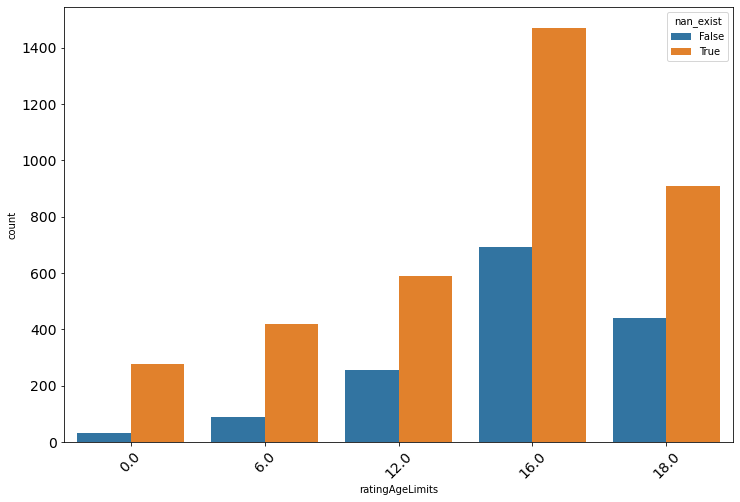

In [193]:
print('\nMissing values in ratingAgeLimits:', sum(pd.isnull(df.ratingAgeLimits)), '\n\n')

plt.figure(figsize=(12, 8))
sns.countplot(x='ratingAgeLimits', hue='nan_exist', data=df_new)
plt.xticks(rotation=45)
plt.show()

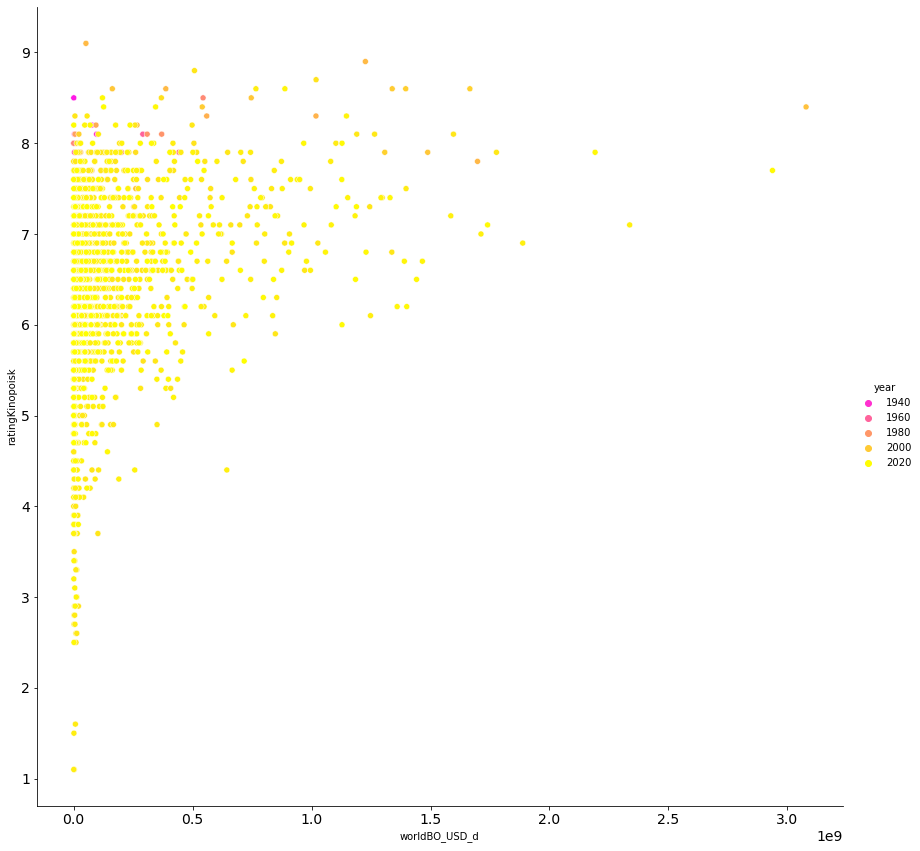

In [194]:
sns.pairplot(x_vars='worldBO_USD_d', y_vars='ratingKinopoisk', data=df2, hue='year', height=12, palette='spring')
plt.show()

Здесь в целом можно увидеть, что чем больше бюджет у фильма, тем выше рейтинг. Интересно, что фильм с самым высоким рейтингом - Побег из Шоушенка, этому правилу не подчиняется.

<a id='s14'></a>

#### Correlation Matrix and Heatmap Before Building and Training the Model

In [195]:
df2.columns

Index(['kinopoiskId', 'name', 'year', 'description', 'ratingAgeLimits',
       'countries', 'genres', 'filmLength_mins', 'premiereRu', 'distributors',
       'budget_USD_d', 'rusBO_USD_d', 'worldBO_USD_d', 'director_id',
       'actor_id', 'producer_id', 'writer_id', 'operator_id', 'editor_id',
       'ratingKinopoisk', 'budget_USD', 'rusBO_USD', 'worldBO_USD'],
      dtype='object')

In [196]:
#corr_table = df2[[
    #'rus',
 #                 'worldBO_USD_d', 'budget_USD_d',
  #                'year', 'premiereRu', 'ratingKinopoisk', 
   #               'ratingAgeLimits', 'actor_id', 'director_id', 'filmLength_mins']]


corr_table = df2[['year', 'ratingAgeLimits',
       'filmLength_mins', 'premiereRu',
       'budget_USD_d', 'rusBO_USD_d', 'worldBO_USD_d', 'director_id',
       'actor_id', 'producer_id', 'writer_id', 'operator_id', 'editor_id',
       'ratingKinopoisk']]

corr_table = corr_table.corr()
corr_table

,year,ratingAgeLimits,filmLength_mins,premiereRu,budget_USD_d,rusBO_USD_d,worldBO_USD_d,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk
year,1.000000,0.135269,-0.032635,0.552503,0.033328,0.047039,-0.036144,0.178070,0.184604,0.162960,0.194561,0.171522,0.165750,-0.232681
ratingAgeLimits,0.135269,1.000000,0.097005,0.065757,-0.263810,-0.276722,-0.185388,-0.031911,-0.069981,-0.021405,0.014874,-0.148090,-0.043521,-0.105730
filmLength_mins,-0.032635,0.097005,1.000000,-0.040361,0.386183,0.230924,0.374623,-0.225765,-0.098749,-0.066387,-0.154577,-0.175936,-0.042376,0.410453
premiereRu,0.552503,0.065757,-0.040361,1.000000,-0.022701,-0.047095,-0.084228,0.219896,0.244313,0.239484,0.243425,0.214079,0.199722,-0.150022
budget_USD_d,0.033328,-0.263810,0.386183,-0.022701,1.000000,0.652985,0.772298,-0.204232,-0.133478,-0.119357,-0.212752,-0.145703,-0.169360,0.220497
rusBO_USD_d,0.047039,-0.276722,0.230924,-0.047095,0.652985,1.000000,0.679965,-0.059676,-0.065173,-0.104429,-0.086312,-0.019520,-0.051334,0.144508
worldBO_USD_d,-0.036144,-0.185388,0.374623,-0.084228,0.772298,0.679965,1.000000,-0.149249,-0.108748,-0.125153,-0.176347,-0.096158,-0.141444,0.296266
director_id,0.178070,-0.031911,-0.225765,0.219896,-0.204232,-0.059676,-0.149249,1.000000,0.297196,0.280670,0.428026,0.410595,0.227180,-0.207591
actor_id,0.184604,-0.069981,-0.098749,0.244313,-0.133478,-0.065173,-0.108748,0.297196,1.000000,0.158004,0.264286,0.280431,0.187999,-0.131918
producer_id,0.162960,-0.021405,-0.066387,0.239484,-0.119357,-0.104429,-0.125153,0.280670,0.158004,1.000000,0.229367,0.210579,0.146420,-0.118156


<Figure size 1296x1296 with 0 Axes>

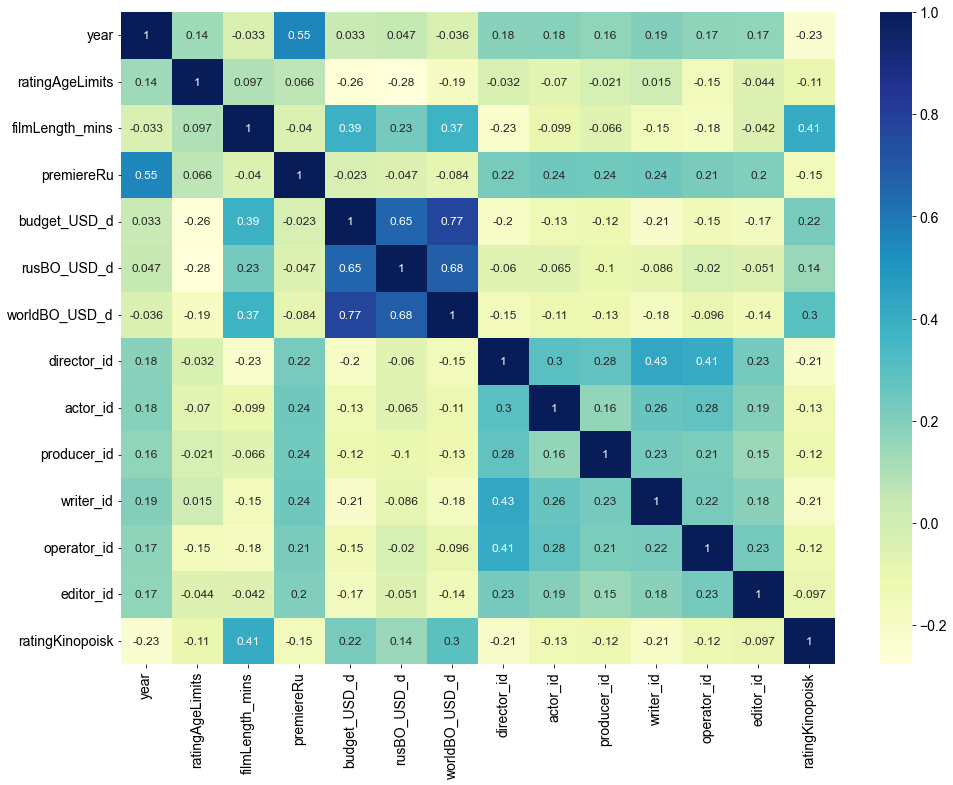

In [197]:
plt.figure(figsize=(18,18))
fig, ax = plt.subplots(figsize=(16,12))

sns.heatmap(corr_table,cmap="YlGnBu", annot=True, 
            annot_kws={"size": 12}, cbar=True, ax=ax)
sns.set(font_scale=1)
plt.ylim((corr_table.shape[0], 0)) # fixes bug in matplotlib 3.1.1, should be removed in other versions
plt.show()

Недопустимо высокой корреляционной связью прищнаком является значение выше 0.75, поэтому, можно сказать, что у нас все в порядке. Выделяются из всех свяи признаков года релиза фильма и премьеры в россии, продолжительноти фильма с бюджетов и сборами, директора и сценариста/оператора картины.

[Back to Contents](#ss)

<a id='s15'></a>

## Model Creation and Testing

В данном разделе будет проводиться предсказание объема российских сборов для фильмов методами `Supervised Machine Learning`. Отдано предпочтение предсказанию но основе построения регрессий, так как для использования нейронных сетей наша выборка недостаточно обширна.

### Standartisation & Normalization, Splitting

При построении регрессий различными способами необходимо либо нормализовать либо стандартизовать данные (нормализация приводит все значения в промежуток от 0 до 1, стандартизация приводит данные к виду, когда итоговое распределение данных имеет среднее раное 0, и стандартное отклонение равное 1). 

In [193]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [194]:
# начнем избавляться от лишнего и приводить данные к нужному для модели виду
df_cut = df2[['kinopoiskId', 'year', 'ratingAgeLimits',
              'filmLength_mins', 'premiereRu', 'director_id', 
              'actor_id', 'producer_id', 'writer_id', 'operator_id', 
              'editor_id', 'ratingKinopoisk', 'budget_USD_d',
              #'worldBO_USD_d'
             ]]

Параметр мировых сборов с наивысшей корреляцией с целевым, к сожалению, придется убрать, так как исходя из сути данных, для фильмов российского производства мировые сборы равны сюоам российским, что будет искажать работу модели.

In [195]:
df_cut

,kinopoiskId,year,ratingAgeLimits,filmLength_mins,premiereRu,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD_d
0,301,1999,16,136,1999,23330,7836,1790,23329,278101,310065,8.5,1.014300e+08
1,312,2002,12,179,2003,32383,20287,32383,32384,225142,1995795,8.6,1.400600e+08
2,326,1994,16,142,1999,24262,7987,102292,24263,258609,1986116,9.1,4.525000e+07
3,328,2001,12,178,2002,32383,20287,32383,32384,225142,537276,8.6,1.413600e+08
4,336,1975,18,133,2021,20418,30056,10094,179853,118654,9775,8.5,1.497000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,2021,6,88,2021,3400706,3022906,6329112,904236,5638209,2010133,5.8,3.000000e+07
1745,1334853,2020,16,115,2020,4194390,3915139,2811305,4971344,287010,2229455,5.1,1.769914e+06
1746,1337697,2019,6,85,2020,277532,5927423,277532,174179,273004,5345517,7.6,7.696248e+05
1747,1347949,2020,16,117,2021,1468864,2924154,2292096,5806677,1566255,3919536,7.8,1.643200e+07


Присоединим наши бинарные таблицы с признаками жанра, страны и дистрибьютера.

In [196]:
data_stdz = df_cut.join(genres_df.set_index('kinopoiskId'), on='kinopoiskId')

In [197]:
data_stdz = data_stdz.join(countries_df.set_index('kinopoiskId'), on='kinopoiskId')

In [198]:
data_stdz = data_stdz.join(distributors_df.set_index('kinopoiskId'), on='kinopoiskId')

In [199]:
data_stdz

,kinopoiskId,year,ratingAgeLimits,filmLength_mins,premiereRu,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD_d,anime,biography,...,Pioneer,Plan_Project,Planet_Inform,Premium_Movie,Premier_Cinema,Prestige_Cinema,Pro__look,Rocket_Release,Russian_Reporting,Sat_Film,DSS,Kick_scooter,Central_Partnership,Central_Partnership_Classic,Exhibitor
0,301,1999,16,136,1999,23330,7836,1790,23329,278101,310065,8.5,1.014300e+08,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,312,2002,12,179,2003,32383,20287,32383,32384,225142,1995795,8.6,1.400600e+08,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,326,1994,16,142,1999,24262,7987,102292,24263,258609,1986116,9.1,4.525000e+07,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,328,2001,12,178,2002,32383,20287,32383,32384,225142,537276,8.6,1.413600e+08,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,336,1975,18,133,2021,20418,30056,10094,179853,118654,9775,8.5,1.497000e+07,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1322683,2021,6,88,2021,3400706,3022906,6329112,904236,5638209,2010133,5.8,3.000000e+07,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1745,1334853,2020,16,115,2020,4194390,3915139,2811305,4971344,287010,2229455,5.1,1.769914e+06,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1746,1337697,2019,6,85,2020,277532,5927423,277532,174179,273004,5345517,7.6,7.696248e+05,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1747,1347949,2020,16,117,2021,1468864,2924154,2292096,5806677,1566255,3919536,7.8,1.643200e+07,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [200]:
# не учитываем айди фильма, он не нужен для модели
scaler = StandardScaler()
df_stdz = pd.DataFrame(scaler.fit_transform(data_stdz.iloc[:, 1:]), columns=data_stdz.iloc[:, 1:].columns)

In [201]:
df_stdz

,year,ratingAgeLimits,filmLength_mins,premiereRu,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD_d,anime,biography,action_movie,...,Pioneer,Plan_Project,Planet_Inform,Premium_Movie,Premier_Cinema,Prestige_Cinema,Pro__look,Rocket_Release,Russian_Reporting,Sat_Film,DSS,Kick_scooter,Central_Partnership,Central_Partnership_Classic,Exhibitor
0,-2.256230,0.319696,1.341233,-4.440079,-0.663423,-0.612454,-0.661445,-0.769623,-0.627337,-1.398784,2.050608,0.885057,-0.075832,-0.275038,1.524826,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
1,-1.801308,-0.722520,3.579012,-3.321747,-0.652706,-0.600564,-0.637051,-0.761540,-0.690540,0.315618,2.150002,1.518950,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
2,-3.014434,0.319696,1.653482,-4.440079,-0.662319,-0.612310,-0.581308,-0.768789,-0.650599,0.305775,2.646969,-0.036820,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
3,-1.952949,-0.722520,3.526971,-3.601330,-0.652706,-0.600564,-0.637051,-0.761540,-0.690540,-1.167708,2.150002,1.540283,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
4,-5.895608,0.840804,1.185109,1.710748,-0.666870,-0.591236,-0.654824,-0.629897,-0.817627,-1.704181,2.050608,-0.533695,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1.079866,-2.285843,-1.156753,1.710748,3.334760,2.266641,4.383798,0.016746,5.769628,0.330200,-0.633015,-0.287063,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
1745,0.928225,0.319696,0.248364,1.431165,4.274334,3.118635,1.578790,3.647375,-0.616704,0.553253,-1.328770,-0.750300,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
1746,0.776584,-2.285843,-1.312877,1.431165,-0.362495,5.040168,-0.441576,-0.634962,-0.633420,3.722315,1.156067,-0.766714,-0.075832,-0.275038,-0.655812,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,41.809090,-0.075832,-0.067787,-0.11024,-0.033835,-0.093008,-0.023918,-0.379322,-0.041451,-0.158761
1747,0.928225,0.319696,0.352447,1.710748,1.047820,2.172342,1.164786,4.393061,0.909997,2.272080,1.354854,-0.509705,13.187115,-0.275038,1.524826,...,-0.089829,-0.023918,-0.033835,-0.125218,-0.041451,-0.023918,-0.075832,-0.067787,-0.11024,-0.033835,10.751744,-0.023918,-0.379322,-0.041451,-0.158761


In [202]:
# data_n.iloc[:, :-1] = preprocessing.scale(data_n.iloc[:, :-1])
# data_n

In [203]:
df_stdz.mean(axis=0).round(3)

year                          -0.0
ratingAgeLimits                0.0
filmLength_mins                0.0
premiereRu                    -0.0
director_id                   -0.0
                              ... 
DSS                           -0.0
Kick_scooter                   0.0
Central_Partnership            0.0
Central_Partnership_Classic    0.0
Exhibitor                     -0.0
Length: 202, dtype: float64

In [204]:
df_stdz.std(axis=0).round(3)

year                           1.0
ratingAgeLimits                1.0
filmLength_mins                1.0
premiereRu                     1.0
director_id                    1.0
                              ... 
DSS                            1.0
Kick_scooter                   1.0
Central_Partnership            1.0
Central_Partnership_Classic    1.0
Exhibitor                      1.0
Length: 202, dtype: float64

In [205]:
corr_table = df_stdz.join(df2['rusBO_USD_d']).corr()
corr_table

,year,ratingAgeLimits,filmLength_mins,premiereRu,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD_d,anime,biography,action_movie,...,Plan_Project,Planet_Inform,Premium_Movie,Premier_Cinema,Prestige_Cinema,Pro__look,Rocket_Release,Russian_Reporting,Sat_Film,DSS,Kick_scooter,Central_Partnership,Central_Partnership_Classic,Exhibitor,rusBO_USD_d
year,1.000000,0.135269,-0.032635,0.552503,0.178070,0.184604,0.162960,0.194561,0.171522,0.165750,-0.232681,0.033328,-0.135446,0.043711,0.102616,...,-0.003187,0.031407,-0.036378,-0.009714,0.018575,0.040491,0.017950,-0.068025,0.026276,0.090094,0.022202,0.042007,0.000762,0.057226,0.047039
ratingAgeLimits,0.135269,1.000000,0.097005,0.065757,-0.031911,-0.069981,-0.021405,0.014874,-0.148090,-0.043521,-0.105730,-0.263810,-0.129871,0.047145,0.037487,...,0.020111,0.019633,-0.025220,-0.008349,-0.054673,0.055856,0.012840,0.046185,0.028449,-0.038120,0.007647,-0.036866,0.013252,0.050755,-0.276722
filmLength_mins,-0.032635,0.097005,1.000000,-0.040361,-0.225765,-0.098749,-0.066387,-0.154577,-0.175936,-0.042376,0.410453,0.386183,-0.006818,0.132545,0.170212,...,0.083114,0.005762,-0.036720,0.036181,-0.031402,0.016861,-0.014914,0.016179,0.023371,-0.006587,-0.018954,0.015428,0.018205,-0.061445,0.230924
premiereRu,0.552503,0.065757,-0.040361,1.000000,0.219896,0.244313,0.239484,0.243425,0.214079,0.199722,-0.150022,-0.022701,-0.118326,0.069161,0.080367,...,-0.005892,0.053154,-0.080117,-0.017937,0.034231,0.076726,0.016468,-0.094669,0.043694,0.145245,0.040918,0.000561,0.001378,0.095085,-0.047095
director_id,0.178070,-0.031911,-0.225765,0.219896,1.000000,0.297196,0.280670,0.428026,0.410595,0.227180,-0.207591,-0.204232,-0.008819,-0.056399,-0.061665,...,-0.014141,0.013074,-0.022091,-0.018568,-0.008670,0.099356,0.013270,-0.033147,-0.002774,0.070168,0.117518,0.015384,-0.027275,0.022718,-0.059676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kick_scooter,0.022202,0.007647,-0.018954,0.040918,0.117518,0.093298,0.074434,0.013993,0.103118,0.085321,-0.034159,-0.018151,-0.001814,-0.006578,-0.015686,...,-0.000572,-0.000809,-0.002995,-0.000991,-0.000572,-0.001814,-0.001621,-0.002637,-0.000809,-0.002225,1.000000,-0.009073,-0.000991,-0.003797,-0.014176
Central_Partnership,0.042007,-0.036866,0.015428,0.000561,0.015384,0.058077,-0.029958,0.046614,0.013755,0.020329,-0.080739,0.024996,0.016971,-0.023410,0.093381,...,-0.009073,-0.012834,-0.047498,-0.015723,-0.009073,-0.028765,-0.025713,-0.025986,-0.012834,-0.035280,-0.009073,1.000000,-0.015723,-0.060222,0.075147
Central_Partnership_Classic,0.000762,0.013252,0.018205,0.001378,-0.027275,-0.009250,-0.009110,-0.030539,-0.024263,-0.005112,0.028694,-0.018575,-0.003143,0.042637,-0.027184,...,-0.000991,-0.001403,-0.005190,-0.001718,-0.000991,-0.003143,-0.002810,-0.004570,-0.001403,-0.003855,-0.000991,-0.015723,1.000000,-0.006581,-0.020896
Exhibitor,0.057226,0.050755,-0.061445,0.095085,0.022718,0.027632,0.044870,0.035742,0.012911,-0.018964,-0.051691,-0.090568,-0.012039,0.028532,-0.055811,...,-0.003797,-0.005372,-0.019880,-0.006581,-0.003797,-0.012039,-0.010762,-0.017502,-0.005372,-0.014766,-0.003797,-0.060222,-0.006581,1.000000,-0.086791


In [206]:
corr_table.describe()

,year,ratingAgeLimits,filmLength_mins,premiereRu,director_id,actor_id,producer_id,writer_id,operator_id,editor_id,ratingKinopoisk,budget_USD_d,anime,biography,action_movie,...,Plan_Project,Planet_Inform,Premium_Movie,Premier_Cinema,Prestige_Cinema,Pro__look,Rocket_Release,Russian_Reporting,Sat_Film,DSS,Kick_scooter,Central_Partnership,Central_Partnership_Classic,Exhibitor,rusBO_USD_d
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.006773,-0.001605,0.017258,0.006986,0.009645,0.015370,0.013157,0.006549,0.018108,0.012452,0.014039,0.001583,0.007859,0.008546,0.004794,...,0.004058,0.007172,0.000381,0.030016,0.006336,0.004838,0.006910,0.011061,0.004718,0.005012,0.005550,-0.004895,0.009916,0.001010,-0.001767
std,0.108335,0.117928,0.102843,0.105185,0.105861,0.094972,0.089455,0.098848,0.101926,0.091115,0.102515,0.132287,0.100683,0.086518,0.104174,...,0.071948,0.073848,0.076633,0.125152,0.082317,0.081312,0.077932,0.090676,0.072314,0.074012,0.072194,0.079941,0.082190,0.076029,0.110975
min,-0.663825,-0.686131,-0.247817,-0.219273,-0.252380,-0.187457,-0.146854,-0.243095,-0.234912,-0.286915,-0.261068,-0.271795,-0.135446,-0.121605,-0.274967,...,-0.036521,-0.023526,-0.080117,-0.028822,-0.054673,-0.099242,-0.048042,-0.122511,-0.023526,-0.041024,-0.034159,-0.138217,-0.030539,-0.090568,-0.276722
25%,-0.010441,-0.017281,-0.019362,-0.025953,-0.021900,-0.018559,-0.018947,-0.023488,-0.017583,-0.019546,-0.019129,-0.040820,-0.009130,-0.013974,-0.027452,...,-0.003291,-0.003730,-0.012946,-0.004837,-0.003467,-0.008459,-0.006814,-0.011697,-0.004156,-0.008188,-0.003050,-0.024689,-0.004570,-0.012630,-0.037786
50%,0.004067,0.011537,0.007523,0.000795,-0.011588,-0.004223,-0.006483,-0.009615,-0.003970,0.006868,0.012978,-0.018889,-0.003631,-0.006578,-0.015686,...,-0.001403,-0.001620,-0.005995,-0.001985,-0.001403,-0.003631,-0.002838,-0.004570,-0.001812,-0.003855,-0.001281,-0.012834,-0.001985,-0.005372,-0.017964
75%,0.019041,0.027157,0.039506,0.027544,0.013172,0.030478,0.027224,0.018827,0.032313,0.019789,0.041915,-0.005830,-0.001814,0.020243,0.020202,...,-0.000691,-0.000809,-0.002995,-0.000991,-0.000691,-0.001814,-0.001621,-0.002637,-0.000809,-0.002225,-0.000572,-0.002875,-0.000991,-0.003797,-0.008037
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Данных у нас очень много после приведения к бинарному виду, поэтому нужно определить, какие признаки щначимы для предсказания целевой переменной, а какие не особо. Взглянем на корреляцию. Установим очень скромное пороговое значение - 0.1 по модулю

In [207]:
for val in corr_table['rusBO_USD_d']:
    if abs(val) >= 0.1:
        print('{:<30}->    {}'.format(str(corr_table[corr_table['rusBO_USD_d'] == val].index)[8:-19], round(val, 5)))

ratingAgeLimits               ->    -0.27672
filmLength_mins               ->    0.23092
producer_id                   ->    -0.10443
ratingKinopoisk               ->    0.14451
budget_USD_d                  ->    0.65299
action_movie                  ->    0.28623
drama                         ->    -0.22313
cartoon                       ->    0.13334
Adventure                     ->    0.42494
family                        ->    0.16051
fantastic                     ->    0.23713
fantasy                       ->    0.237
USA                           ->    0.16991
France                        ->    -0.14922
WDSSPR                        ->    0.27343
20th_Century_Fox_CIS          ->    0.10476
Karo_Premier                  ->    0.14625
Paradise                      ->    -0.10408
rusBO_USD_d                   ->    1.0


In [208]:
df_work = df_stdz[['ratingAgeLimits', 'filmLength_mins', 'producer_id', 
                   'ratingKinopoisk', 'budget_USD_d', 'action_movie', 
                   'drama', 'cartoon', 'Adventure', 'family', 'fantastic', 'fantasy', 
                   'USA', 'France', 'WDSSPR', '20th_Century_Fox_CIS', 'Karo_Premier', 
                   'Paradise']]

In [209]:
# df_work = df_stdz[['budget_USD_d', 'worldBO_USD_d', 'Adventure']]

In [210]:
df_work

,ratingAgeLimits,filmLength_mins,producer_id,ratingKinopoisk,budget_USD_d,action_movie,drama,cartoon,Adventure,family,fantastic,fantasy,USA,France,WDSSPR,20th_Century_Fox_CIS,Karo_Premier,Paradise
0,0.319696,1.341233,-0.661445,2.050608,0.885057,1.524826,-0.974594,-0.232915,-0.547180,-0.319499,2.261722,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,3.558660,-0.276238
1,-0.722520,3.579012,-0.637051,2.150002,1.518950,-0.655812,1.026069,-0.232915,1.827553,-0.319499,-0.442141,2.371708,0.654921,-0.410289,-0.364379,-0.301793,3.558660,-0.276238
2,0.319696,1.653482,-0.581308,2.646969,-0.036820,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
3,-0.722520,3.526971,-0.637051,2.150002,1.540283,-0.655812,1.026069,-0.232915,1.827553,-0.319499,-0.442141,2.371708,0.654921,-0.410289,-0.364379,-0.301793,3.558660,-0.276238
4,0.840804,1.185109,-0.654824,2.050608,-0.533695,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,-2.285843,-1.156753,4.383798,-0.633015,-0.287063,-0.655812,-0.974594,4.293406,1.827553,3.129904,-0.442141,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
1745,0.319696,0.248364,1.578790,-1.328770,-0.750300,-0.655812,-0.974594,-0.232915,-0.547180,-0.319499,2.261722,-0.421637,-1.526902,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
1746,-2.285843,-1.312877,-0.441576,1.156067,-0.766714,-0.655812,-0.974594,-0.232915,-0.547180,3.129904,-0.442141,-0.421637,-1.526902,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
1747,0.319696,0.352447,1.164786,1.354854,-0.509705,1.524826,-0.974594,4.293406,-0.547180,-0.319499,-0.442141,2.371708,-1.526902,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238


Разделим на обучающую и тестовую выборки.
Классическое сочетание 30 на 70 (тестовая и обучающая), но в нашем случае пропорция 40 на 60 дает лучшие результаты.

In [211]:
(trainData, testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(df_work, df2['rusBO_USD_d'],
                                            test_size=0.3, 
                                            random_state=5)

In [212]:
trainData.shape

(1224, 18)

In [213]:
testData.shape

(525, 18)

In [214]:
trainData

,ratingAgeLimits,filmLength_mins,producer_id,ratingKinopoisk,budget_USD_d,action_movie,drama,cartoon,Adventure,family,fantastic,fantasy,USA,France,WDSSPR,20th_Century_Fox_CIS,Karo_Premier,Paradise
390,0.319696,-0.115925,-0.660195,-0.036655,0.626610,-0.655812,-0.974594,-0.232915,-0.547180,-0.319499,-0.442141,2.371708,-1.526902,2.437309,-0.364379,-0.301793,-0.281005,-0.276238
841,0.319696,-0.115925,-0.662583,-0.235441,-0.000555,-0.655812,-0.974594,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,3.558660,-0.276238
1319,0.840804,-0.844504,-0.184686,1.056674,-0.592411,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,-1.526902,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
196,0.319696,0.560613,-0.624317,-0.633015,1.642677,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,0.654921,-0.410289,2.744396,-0.301793,-0.281005,-0.276238
533,0.319696,-0.428173,1.297196,1.056674,-0.529757,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,0.840804,-0.428173,-0.226523,-0.831802,-0.723715,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,0.654921,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
998,0.840804,-1.416960,0.675316,-3.117852,-0.741602,-0.655812,-0.974594,-0.232915,-0.547180,-0.319499,-0.442141,-0.421637,-1.526902,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
1725,-0.722520,0.404489,-0.483759,-0.235441,-0.640457,1.524826,1.026069,-0.232915,1.827553,-0.319499,-0.442141,-0.421637,-1.526902,-0.410289,-0.364379,-0.301793,-0.281005,-0.276238
206,0.319696,-0.376132,-0.629503,0.559706,-0.476591,-0.655812,1.026069,-0.232915,-0.547180,-0.319499,2.261722,-0.421637,-1.526902,-0.410289,-0.364379,3.313526,-0.281005,-0.276238


<a id='s17'></a>

In [215]:
results = pd.DataFrame(columns=['Model', 'Comment', 'Metric', 'Score'])

### Linear Regression

In [216]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

In [217]:
def calc_metrics(true, pred, prnt=True):

    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(true, pred)
    medae = metrics.median_absolute_error(true, pred)
    R2 = metrics.r2_score(true, pred)
    
    if prnt == True:
        print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))
    
    return float(R2)

In [218]:
regrModel = linear_model.LinearRegression()
regrModel.fit(trainData, trainDependentVariables)

LinearRegression()

In [219]:
predictedDependentVariables = regrModel.predict(testData)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

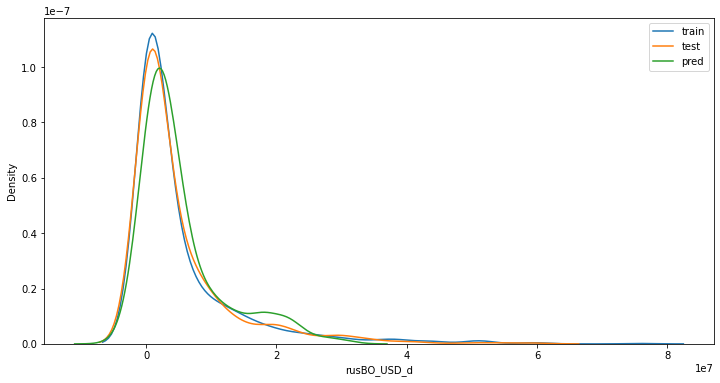

In [220]:
# style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


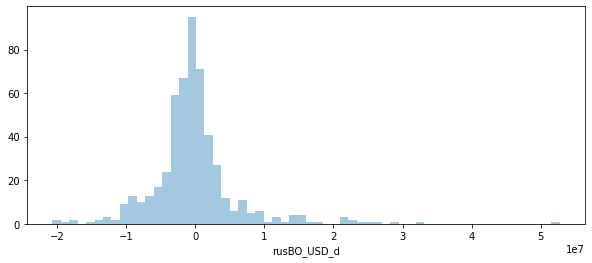

In [221]:
plt.figure(figsize=(10,4))
error = testDependentVariables - predictedDependentVariables
sns.distplot(error, bins=60, kde=False)
plt.show()

In [222]:
print('Метрики обучающей выборки Train\n')
calc_metrics(trainDependentVariables, regrModel.predict(trainData))

Метрики обучающей выборки Train

MSE:   43122994290889.65
RMSE:  6566810.05442442
R2:    0.4915130068067033
MAE:   3880466.295254674
MedAE: 2307151.636930081


0.4915130068067033

In [223]:
print('Метрики тестовой выборки Test\n')
calc_metrics(testDependentVariables, predictedDependentVariables)

Метрики тестовой выборки Test

MSE:   42242530645600.53
RMSE:  6499425.408880429
R2:    0.38800815181090387
MAE:   3958861.3001204445
MedAE: 2301383.1740397676


0.38800815181090387

In [224]:
results = results.append({'Model': 'Linear', 'Comment': 'with ratingAgeLimits, filmLength_mins, producer_id, \
                                                ratingKinopoisk, budget_USD_d, action_movie, drama, \
                                                cartoon, Adventure, family, fantastic, fantasy, USA, \
                                                France, WDSSPR, 20th_Century_Fox_CIS, Karo_Premier, Paradise  parameters, \
                                                30/70 split', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, predictedDependentVariables, prnt=False)},
               ignore_index=True)

In [225]:
results

,Model,Comment,Metric,Score
0,Linear,"with ratingAgeLimits, filmLength_mins, producer_id, ratingKinopoisk, budget_USD_d, action_movie, drama, cartoon, Adventure, family, fantastic, fantasy, USA, France, WDSSPR, 20th_Century_Fox_CIS, Karo_Premier, Paradise parameters, 30/70 split",R^2,0.388008


Если качество на трейн выборке лучше, значит происходит переобучение. Скорее всего это связано с тем, что мы взяли очень низкое значение корреляции и слишком большой размер тренировочных данных. Если поставить границу зависимости хотя бы на уровне 0.25 по модулю ситуация меняется.

In [226]:
for val in corr_table['rusBO_USD_d']:
    if abs(val) >= 0.25:
        print('{:<30}->    {}'.format(str(corr_table[corr_table['rusBO_USD_d'] == val].index)[8:-19], round(val, 5)))

ratingAgeLimits               ->    -0.27672
budget_USD_d                  ->    0.65299
action_movie                  ->    0.28623
Adventure                     ->    0.42494
WDSSPR                        ->    0.27343
rusBO_USD_d                   ->    1.0


In [227]:
df_work = df_stdz[['budget_USD_d', 'Adventure', 'ratingAgeLimits', 
                  'action_movie', 'WDSSPR']]

Разделим на обучающую и тестовую выборки с другим соотношением.

In [228]:
(trainData, testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(df_work, df2['rusBO_USD_d'],
                                            test_size=0.45, 
                                            random_state=5)

In [229]:
trainData.shape

(961, 5)

In [230]:
testData.shape

(788, 5)

In [231]:
regrModel = linear_model.LinearRegression()
regrModel.fit(trainData, trainDependentVariables)

LinearRegression()

In [232]:
predictedDependentVariables = regrModel.predict(testData)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

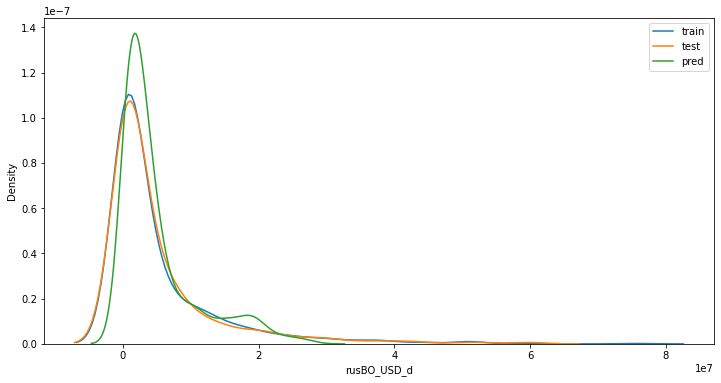

In [233]:
# style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(trainDependentVariables, bins=100, hist=False, label='train')
sns.distplot(testDependentVariables, bins=100, hist=False, label='test')
sns.distplot(predictedDependentVariables, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

In [234]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   43764043505167.62
RMSE:  6615439.781690074
R2:    0.45492911993324237
MAE:   3686068.2813710817
MedAE: 1840140.7110550827


0.45492911993324237

In [235]:
calc_metrics(trainDependentVariables, regrModel.predict(trainData))

MSE:   45563288279612.3
RMSE:  6750058.390829838
R2:    0.4298606441294809
MAE:   3892035.5682006045
MedAE: 2099616.99836789


0.4298606441294809

In [236]:
results = results.append({'Model': 'Linear', 'Comment': 'with ratingAgeLimits, ratingKinopoisk, \
                                               budget_USD_d, Adventure, action_movie, WDSSPR parameters, \
                                               45/55 split', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, predictedDependentVariables, prnt=False)},
               ignore_index=True)

In [237]:
results

,Model,Comment,Metric,Score
0,Linear,"with ratingAgeLimits, filmLength_mins, producer_id, ratingKinopoisk, budget_USD_d, action_movie, drama, cartoon, Adventure, family, fantastic, fantasy, USA, France, WDSSPR, 20th_Century_Fox_CIS, Karo_Premier, Paradise parameters, 30/70 split",R^2,0.388008
1,Linear,"with ratingAgeLimits, ratingKinopoisk, budget_USD_d, Adventure, action_movie, WDSSPR parameters, 45/55 split",R^2,0.454929


Можно видеть, что качество увеличивается, и на тестовых данных теперь не сильно отличается, это значит, что регрессанты  и соотношение выбраны верно.

В целом, рано отчаиваться, ведь линейная регрессия - самый примитивный вариант модели. Однако скорее всего, нам вряд ли удастя достигнуть хоть сколько-то достойных результатов, учитывая особенности выборки.

<a id='s18'></a>

### Ridge Regression

In [238]:
ridgeModel = linear_model.Ridge(alpha=1)

ridgeModel.fit(trainData, trainDependentVariables)

Ridge(alpha=1)

In [239]:
predictedDependentVariables = ridgeModel.predict(testData)

In [240]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   43767447854551.305
RMSE:  6615697.080017442
R2:    0.45488671956147597
MAE:   3686719.231380877
MedAE: 1842540.2854698284


0.45488671956147597

In [241]:
results = results.append({'Model': 'Ridge', 'Comment': 'auto ridge', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, predictedDependentVariables, prnt=False)},
               ignore_index=True)

In [242]:
# регуляризация с кросс валидацией
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 100, 0.1), 
                                  cv=25,
                                  scoring='r2')

In [243]:
# sorted(metrics.SCORERS.keys())

In [244]:
%%time
ridgeModel.fit(trainData, trainDependentVariables)

Wall time: 2min 37s


RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       92.4, 92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4,
       93.5, 93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5,
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6,

In [245]:
predictedDependentVariables = ridgeModel.predict(testData)

In [246]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   44327538974865.22
RMSE:  6657892.98313402
R2:    0.44791091624405543
MAE:   3755947.0251977523
MedAE: 1938286.7241055842


0.44791091624405543

In [247]:
results = results.append({'Model': 'Ridge', 'Comment': 'cross validated ridge', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, predictedDependentVariables, prnt=False)},
               ignore_index=True)

In [248]:
results

,Model,Comment,Metric,Score
0,Linear,"with ratingAgeLimits, filmLength_mins, producer_id, ratingKinopoisk, budget_USD_d, action_movie, drama, cartoon, Adventure, family, fantastic, fantasy, USA, France, WDSSPR, 20th_Century_Fox_CIS, Karo_Premier, Paradise parameters, 30/70 split",R^2,0.388008
1,Linear,"with ratingAgeLimits, ratingKinopoisk, budget_USD_d, Adventure, action_movie, WDSSPR parameters, 45/55 split",R^2,0.454929
2,Ridge,auto ridge,R^2,0.454887
3,Ridge,cross validated ridge,R^2,0.447911


<a id='s19'></a>

### Polynomial Regression

In [249]:
from sklearn.preprocessing import PolynomialFeatures

In [250]:
poly = PolynomialFeatures(degree=2)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 5
Number of features after polynomial transformation: 21


In [251]:
regressionModel = linear_model.Ridge(alpha=1)
regressionModel.fit(poly_train, trainDependentVariables)

Ridge(alpha=1)

In [252]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   42716014349220.73
RMSE:  6535748.950902316
R2:    0.4654889533660368
MAE:   3785307.9176007477
MedAE: 2076909.9530453554

Test:
MSE:   44302038342242.63
RMSE:  6655977.639854467
R2:    0.4482285206323293
MAE:   3755170.5533843706
MedAE: 1831988.2827434717


0.4482285206323293

In [253]:
results = results.append({'Model': 'Polynomial', 'Comment': 'degree = 2', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, regressionModel.predict(poly_test), prnt=False)},
               ignore_index=True)

<a id='s20'></a>

### K Nearest Neighbours Regression

In [254]:
KNNModel = KNeighborsRegressor(n_neighbors=5)

KNNModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor()

In [255]:
predictedDependentVariables = KNNModel.predict(testData)

In [256]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   51093332482606.82
RMSE:  7147960.022454436
R2:    0.36364454763990184
MAE:   3966545.3676421316
MedAE: 1765299.071


0.36364454763990184

In [257]:
# подобрали число к на кросс валидации
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(trainData)

5

In [258]:
M = linear_model.RidgeCV(alphas=np.arange(0.1, 100, 0.1), cv=5)

In [259]:
%%time
M.fit(trainData, trainDependentVariables)

Wall time: 16.5 s


RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,...
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98

In [260]:
predictedDependentVariables = M.predict(testData)

In [261]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   43841047384666.94
RMSE:  6621257.235953527
R2:    0.4539700547051335
MAE:   3698498.712228377
MedAE: 1856509.794595298


0.4539700547051335

In [262]:
results = results.append({'Model': 'KNN', 'Comment': 'K-Fold validation, n_neighbors = 5', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, predictedDependentVariables, prnt=False)},
               ignore_index=True)

In [263]:
# с метриками поиграться можно
mm = ['cosine', 'chebyshev', 'euclidean', 'canberra']
for i in mm:
    KNNModel = KNeighborsRegressor(n_neighbors=5, metric=i)
    KNNModel.fit(trainData, trainDependentVariables)
    predictedDependentVariables = KNNModel.predict(testData)
    print('\n', i)
    calc_metrics(testDependentVariables, predictedDependentVariables)


 cosine
MSE:   50112609095120.164
RMSE:  7079025.999042535
R2:    0.37585922702290453
MAE:   3950381.1988045685
MedAE: 1735141.1469999999

 chebyshev
MSE:   50754638480961.65
RMSE:  7124228.974489916
R2:    0.3678629018586629
MAE:   3950530.3694720813
MedAE: 1742241.9169999994

 euclidean
MSE:   51093332482606.82
RMSE:  7147960.022454436
R2:    0.36364454763990184
MAE:   3966545.3676421316
MedAE: 1765299.071

 canberra
MSE:   51947259884798.03
RMSE:  7207444.754196735
R2:    0.3530090824646942
MAE:   3991040.2343096444
MedAE: 1690365.9049999998


<a id='s21'></a>

### Radius Neighbours

In [264]:
rnrModel = RadiusNeighborsRegressor(radius=3)
rnrModel.fit(trainData, trainDependentVariables)

RadiusNeighborsRegressor(radius=3)

In [265]:
predictedDependentVariables = rnrModel.predict(testData)

In [266]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   50691434878319.77
RMSE:  7119791.772118042
R2:    0.36865008788070686
MAE:   4197633.02405708
MedAE: 2554071.439899276


0.36865008788070686

In [267]:
rnrModel = RadiusNeighborsRegressor(radius=2, metric='euclidean')

rnrModel.fit(trainData, trainDependentVariables)

predictedDependentVariables = rnrModel.predict(testData)

In [268]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   50056105838993.85
RMSE:  7075033.981472729
R2:    0.3765629618032561
MAE:   4167715.604769062
MedAE: 2121346.0216269847


0.3765629618032561

In [269]:
results = results.append({'Model': 'Radius Neighbors', 'Comment': 'radius = 2, metric = euclidean', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, predictedDependentVariables, prnt=False)},
               ignore_index=True)

<a id='s22'></a>

### Desicion Trees

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [271]:
tree = DecisionTreeRegressor(max_depth=3, max_features=3, random_state=17)

In [272]:
tree.fit(trainData, trainDependentVariables)
tree_pr = tree.predict(testData)

In [273]:
# Извлекаем значимость параметров
pp = pd.DataFrame({'feature': list(df_work.columns),
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Выводим значения
pp.head()

,feature,importance
0,budget_USD_d,0.949761
2,ratingAgeLimits,0.035440
3,action_movie,0.014800
1,Adventure,0.000000
4,WDSSPR,0.000000


Видим, что два признака не првносят никакого вклада в модель. Это было видно и сразу, но просто решили оставить.

In [274]:
tree_params = {'max_depth': range(1, 20), 'max_features': range(2, 6)}

In [275]:
tree_grid = GridSearchCV(tree, tree_params, cv=100, n_jobs=-1, verbose=True)

In [276]:
tree_grid.fit(trainData, trainDependentVariables)

Fitting 100 folds for each of 76 candidates, totalling 7600 fits


GridSearchCV(cv=100,
             estimator=DecisionTreeRegressor(max_depth=3, max_features=3,
                                             random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(2, 6)},
             verbose=True)

In [277]:
tree_grid.best_params_

{'max_depth': 2, 'max_features': 4}

In [278]:
calc_metrics(testDependentVariables, tree_pr)

MSE:   45995419351228.875
RMSE:  6781992.28481048
R2:    0.4271378580031444
MAE:   4032476.70463213
MedAE: 1933603.3318936173


0.4271378580031444

In [279]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import tree

In [280]:
tree_model = DecisionTreeRegressor(max_depth=2, max_features=4)
tree_model.fit(trainData, trainDependentVariables)

DecisionTreeRegressor(max_depth=2, max_features=4)

import os
os.environ["PATH"] += os.pathsep + r'C:/Program Files (x86)/graphviz-2.38/release/bin/'
os.environ["PATH"] += os.pathsep + r'C:/Program Files (x86)/graphviz-2.38/release/bin/dot.exe'

dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=trainData.columns, 
                           class_names=np.arange(1, 21, 1),
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("abcd") 

In [281]:
#display(graph)

In [282]:
preds_tree = tree_model.predict(testData)

In [283]:
calc_metrics(testDependentVariables, preds_tree)

MSE:   45684892428052.734
RMSE:  6759060.025480816
R2:    0.4310053978770607
MAE:   3811134.573211331
MedAE: 2087620.88


0.4310053978770607

In [284]:
results = results.append({'Model': 'Desicion Tree', 'Comment': '----', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, preds_tree, prnt=False)},
               ignore_index=True)

<a id='s23'></a>

### Lasso Regression

In [285]:
from sklearn.linear_model import Lasso

In [286]:
lasso = Lasso(alpha=0.1)

lasso.fit(trainData, trainDependentVariables)
y_pred = lasso.predict(testData)

In [287]:
calc_metrics(testDependentVariables, y_pred)

MSE:   43764043465676.586
RMSE:  6615439.778705312
R2:    0.4549291204250938
MAE:   3686068.269884229
MedAE: 1840140.6606067002


0.4549291204250938

Пока лучший результат!

In [288]:
results = results.append({'Model': 'Lasso', 'Comment': 'auto', 
                'Metric': 'R^2', 'Score': calc_metrics(testDependentVariables, y_pred, prnt=False)},
               ignore_index=True)

In [289]:
results

,Model,Comment,Metric,Score
0,Linear,"with ratingAgeLimits, filmLength_mins, producer_id, ratingKinopoisk, budget_USD_d, action_movie, drama, cartoon, Adventure, family, fantastic, fantasy, USA, France, WDSSPR, 20th_Century_Fox_CIS, Karo_Premier, Paradise parameters, 30/70 split",R^2,0.388008
1,Linear,"with ratingAgeLimits, ratingKinopoisk, budget_USD_d, Adventure, action_movie, WDSSPR parameters, 45/55 split",R^2,0.454929
2,Ridge,auto ridge,R^2,0.454887
3,Ridge,cross validated ridge,R^2,0.447911
4,Polynomial,degree = 2,R^2,0.448229
5,KNN,"K-Fold validation, n_neighbors = 5",R^2,0.453970
6,Radius Neighbors,"radius = 2, metric = euclidean",R^2,0.376563
7,Desicion Tree,----,R^2,0.431005
8,Lasso,auto,R^2,0.454929


In [318]:
results.to_excel(r"C:\Users\User\Desktop\output.xlsx")

Посмотрим на коэффициенты лучшей регрессионной модели.

In [315]:
lasso.coef_

array([4983991.29271453,  339673.77572191, -982025.40896208,
        385703.72318796,  322562.72169235])

In [316]:
lasso.intercept_

5214720.009468405

<a id='s24'></a>

### WordCLoud

In [290]:
from wordcloud import WordCloud
from collections import defaultdict

In [291]:
import nltk

In [292]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

In [304]:
nltk.download("stopwords")

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

#Examples    
# preprocess_text("Ну что сказать, я вижу кто-то наступил на грабли, Ты разочаровал меня, ты был натравлен.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Администратор\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [305]:
russian_stopwords.append('который')

In [306]:
russian_stopwords.append('свой')

In [307]:
russian_stopwords.append('каждый')

In [308]:
russian_stopwords.append('весь')

In [309]:
russian_stopwords.append('это')

In [310]:
russian_stopwords.append('"')
russian_stopwords.append('-')
russian_stopwords.append('...')

In [311]:
word_bubble = []

In [312]:
%%time
for i in df2.description:
    lmmd = preprocess_text(i)
    word_bubble.append(lmmd)

Wall time: 32min 7s


(-0.5, 799.5, 399.5, -0.5)

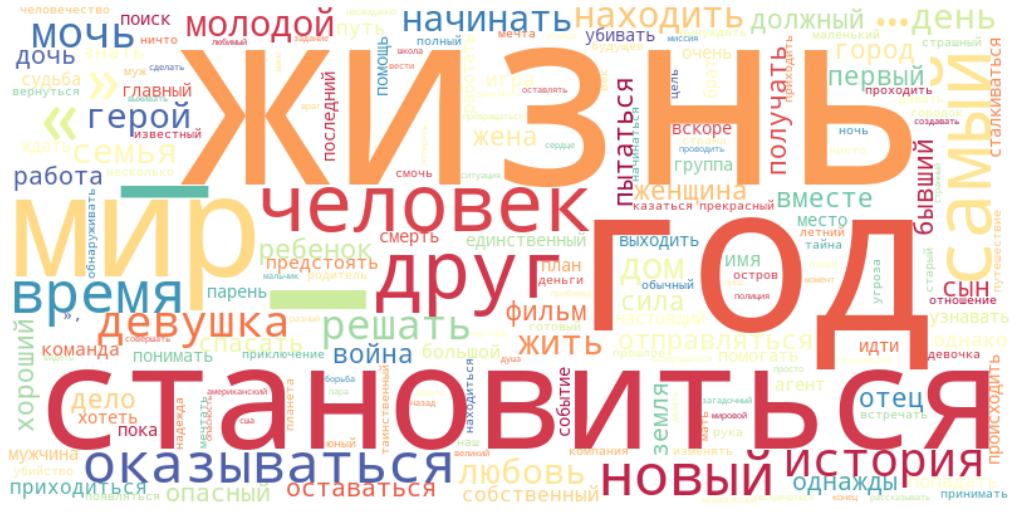

In [313]:
plt.figure(figsize=(18,22))
all_w = defaultdict(int)

for deff in word_bubble:
    for word in deff.split(' '):
        all_w[word.strip()] += 1
        
cloud = WordCloud(width=800, height=400, background_color='white', 
                         colormap='Spectral').generate_from_frequencies(all_w)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')